# Undirected Exploration Methods for Multi-Armed Bandits

## (Random-)Explore-Then-Exploit

This method starts exploring during a determined $\ell$ number of rounds, then exploits until the end.

The exploration is undirected, i.e. done by uniform random choice among all the arms.

$$ 
A_{t+1} = \begin{cases}
i \sim \mathbb{U}(\mathcal{I}) &  \text{ if } t < \ell & \text{ i.e. any action with probability } \frac{1}{k}\\
i^* & \text{ if } t \geq \ell & \text{ where } i^* = \arg\max_{i \in \mathcal{I}} \frac{S_{i,t}}{N_{i,t}}
\end{cases}
$$

## Sequential-Explore-Then-Exploit

Variation where the exploration is sequential.

$$ 
A_{t+1} = \begin{cases}
(t\text{ mod }k) + 1 &   \text{ if } t < \ell \\
i^* & \text{ if } t \geq \ell
\end{cases}
$$

## Less-Observed-Explore-Then-Exploit

Variation where the exploration means to take the less tryied action. Suppose that $j$ is the less tryied action, and $i^*$ the action with best estimated mean:

$$ 
A_{t+1} = \begin{cases}
j &   \text{ if } t < \ell & \text{ where } j = \arg\min_{i \in \mathcal{I}} N_{i,t} \\
i^* & \text{ if } t \geq \ell
\end{cases}
$$


## Epsilon-(Random-Otherwise-)Greedy

$$ 
A_{t+1} = \begin{cases}
i &   \text{ with probability } \frac{\varepsilon}{k} & \text{ if } i \neq i^* \\
i^* & \text{ with probability } \varepsilon + \frac{\varepsilon}{k} & \text{ if } i = i^*
\end{cases}
$$



In [3]:
#Arms
from srl.mab.arms import BernoulliArm

#Policies
#from SMPyBandits.Policies import UCBalpha, UCB, IndexPolicy
from srl.mab.policies import RandomExploreThenExploitPolicy, SequentialExploreThenExploitPolicy, EpsilonGreedyPolicy, GamblerBayesUCBPolicy

#Simulation
from srl.mab.simulator import SMAB

#Import Dependencies
import numpy as np
import pandas as pd

#Plot Dependencies and setup
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (8, 5)
mpl.rcParams['figure.dpi'] = 300
mpl.rcParams['savefig.dpi'] = 300
mpl.rcParams['figure.figsize'] = (8,5)


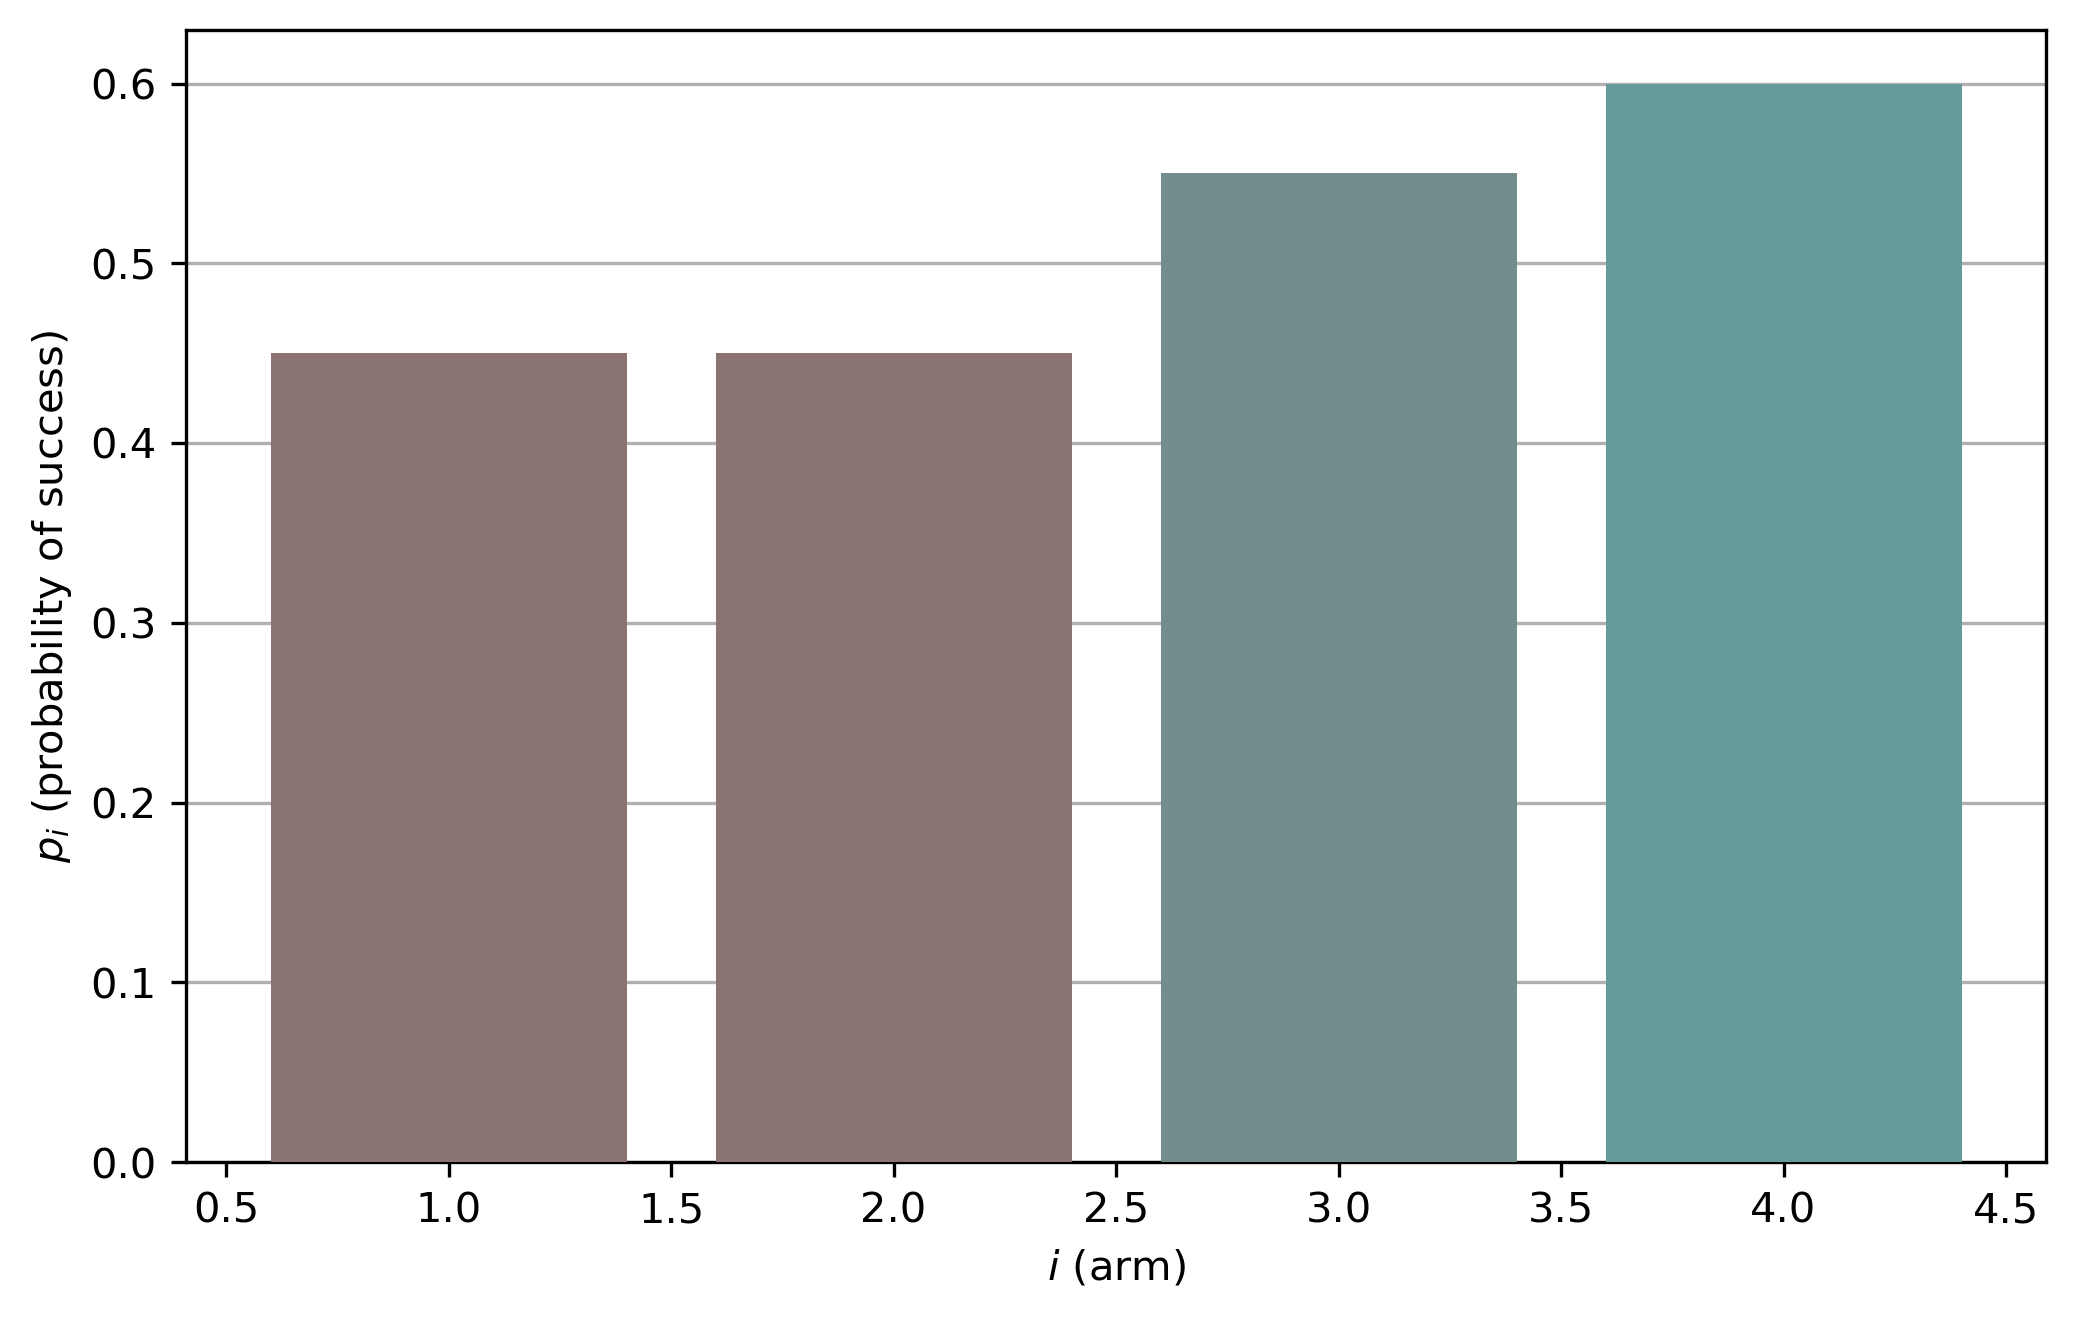

In [4]:
#number of arms and corresponding parameters
p_arr = [0.45] * 2 + [0.55, 0.6]
k = len(p_arr)

#Bernoulli
arms = [BernoulliArm(p, minr=-1.0, maxr=+1.0) for p in p_arr]

#SHOW ARMS
fig, ax = plt.subplots(1)
ax.grid(visible=True, which='major', axis='y', zorder=0)
for i, p in enumerate(p_arr):
    ax.bar(i+1, p, zorder=3, color=(1-p, p, p, 1.0))
plt.xlabel('$i$ (arm)')
plt.ylabel('$p_i$ (probability of success)')
plt.show()

In [5]:
#initial budget
b_0 = k

#each arm must be tried at least w times at beginning
w=0

#time-horizon
h = 1000

#repetitions
n = 100

#algorithm
algs = [RandomExploreThenExploitPolicy(k, h_explore=h//10),
        SequentialExploreThenExploitPolicy(k, h_explore=h//10),
        EpsilonGreedyPolicy(k, epsilon=0.1),
        GamblerBayesUCBPolicy(k, w=w, b_0=b_0)]

M = SMAB(arms=arms, algs=algs, h=h, b_0=10, n=n, w=w, run=False, prev_draw=True, use_multiprocess=True, save_only_means=False)
M.run(tqdm_leave=True)

  0%|          | 0/200 [00:00<?, ?it/s]

In [6]:
#%matplotlib widget
import ipywidgets as widgets
    
@widgets.interact(i={**{'Repetition_'+str(i+1) : i for i in range(M.n)}, **{'Average':None}}, j={str(alg) : j for j, alg in enumerate(M.algs)})
def update1(i=0, j=0):
    #"""Remove old lines from plot and plot new one"""
    #[l.remove() for l in plt.gca().lines]
    M.plot_history(i=i, j=j)

@widgets.interact(i={**{'Repetition_'+str(i+1) : i for i in range(M.n)}, **{'Average':None}}, j={str(alg) : j for j, alg in enumerate(M.algs)})
def update2(i=None, j=0):
    M.plot_action_count_progression(i=i, j=j)

@widgets.interact(i={**{'Repetition_'+str(i+1) : i for i in range(M.n)}, **{'Average':None}}, j={str(alg) : j for j, alg in enumerate(M.algs)})
def update3(i=None, j=0):
    M.plot_action_freq_progression(i=i, j=j)

@widgets.interact(i={**{'Repetition_'+str(i+1) : i for i in range(M.n)}, **{'Average':None}}, j={str(alg) : j for j, alg in enumerate(M.algs)})
def update4(i=None, j=0):
    M.plot_reward_regret(i=i, j=j)

@widgets.interact(i={**{'Repetition_'+str(i+1) : i for i in range(M.n)}, **{'Average':None}}, j={str(alg) : j for j, alg in enumerate(M.algs)})
def update5(i=None, j=0):
    M.plot_comp_freq_prop(i=i, j=j)

interactive(children=(Dropdown(description='i', options={'Repetition_1': 0, 'Repetition_2': 1, 'Repetition_3':…

interactive(children=(Dropdown(description='i', options={'Repetition_1': 0, 'Repetition_2': 1, 'Repetition_3':…

interactive(children=(Dropdown(description='i', options={'Repetition_1': 0, 'Repetition_2': 1, 'Repetition_3':…

interactive(children=(Dropdown(description='i', options={'Repetition_1': 0, 'Repetition_2': 1, 'Repetition_3':…

interactive(children=(Dropdown(description='i', options={'Repetition_1': 0, 'Repetition_2': 1, 'Repetition_3':…

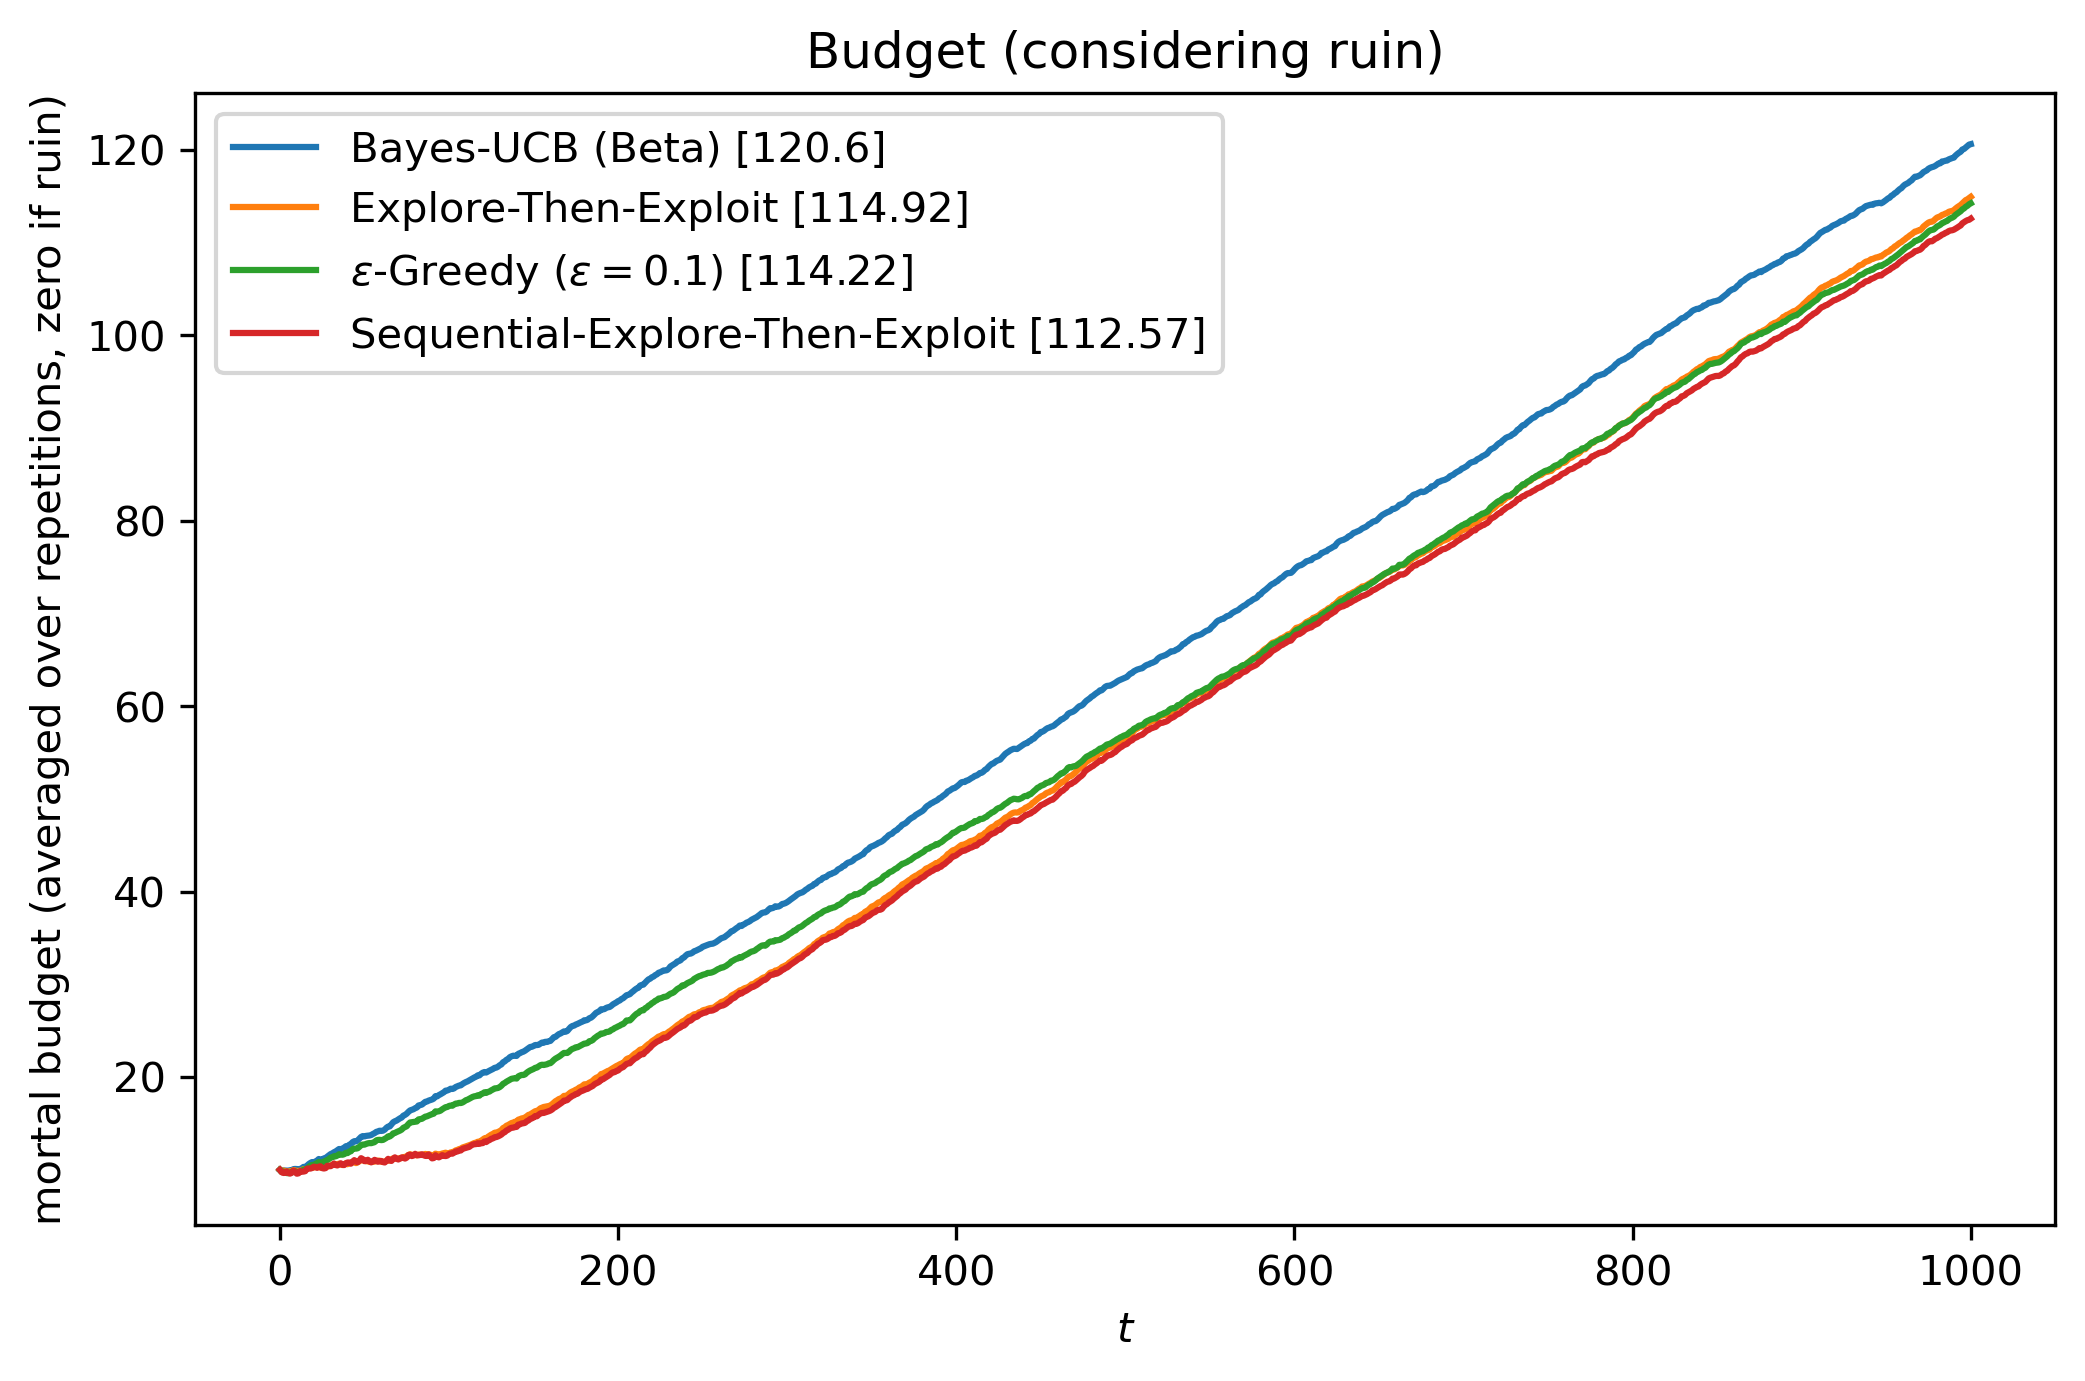

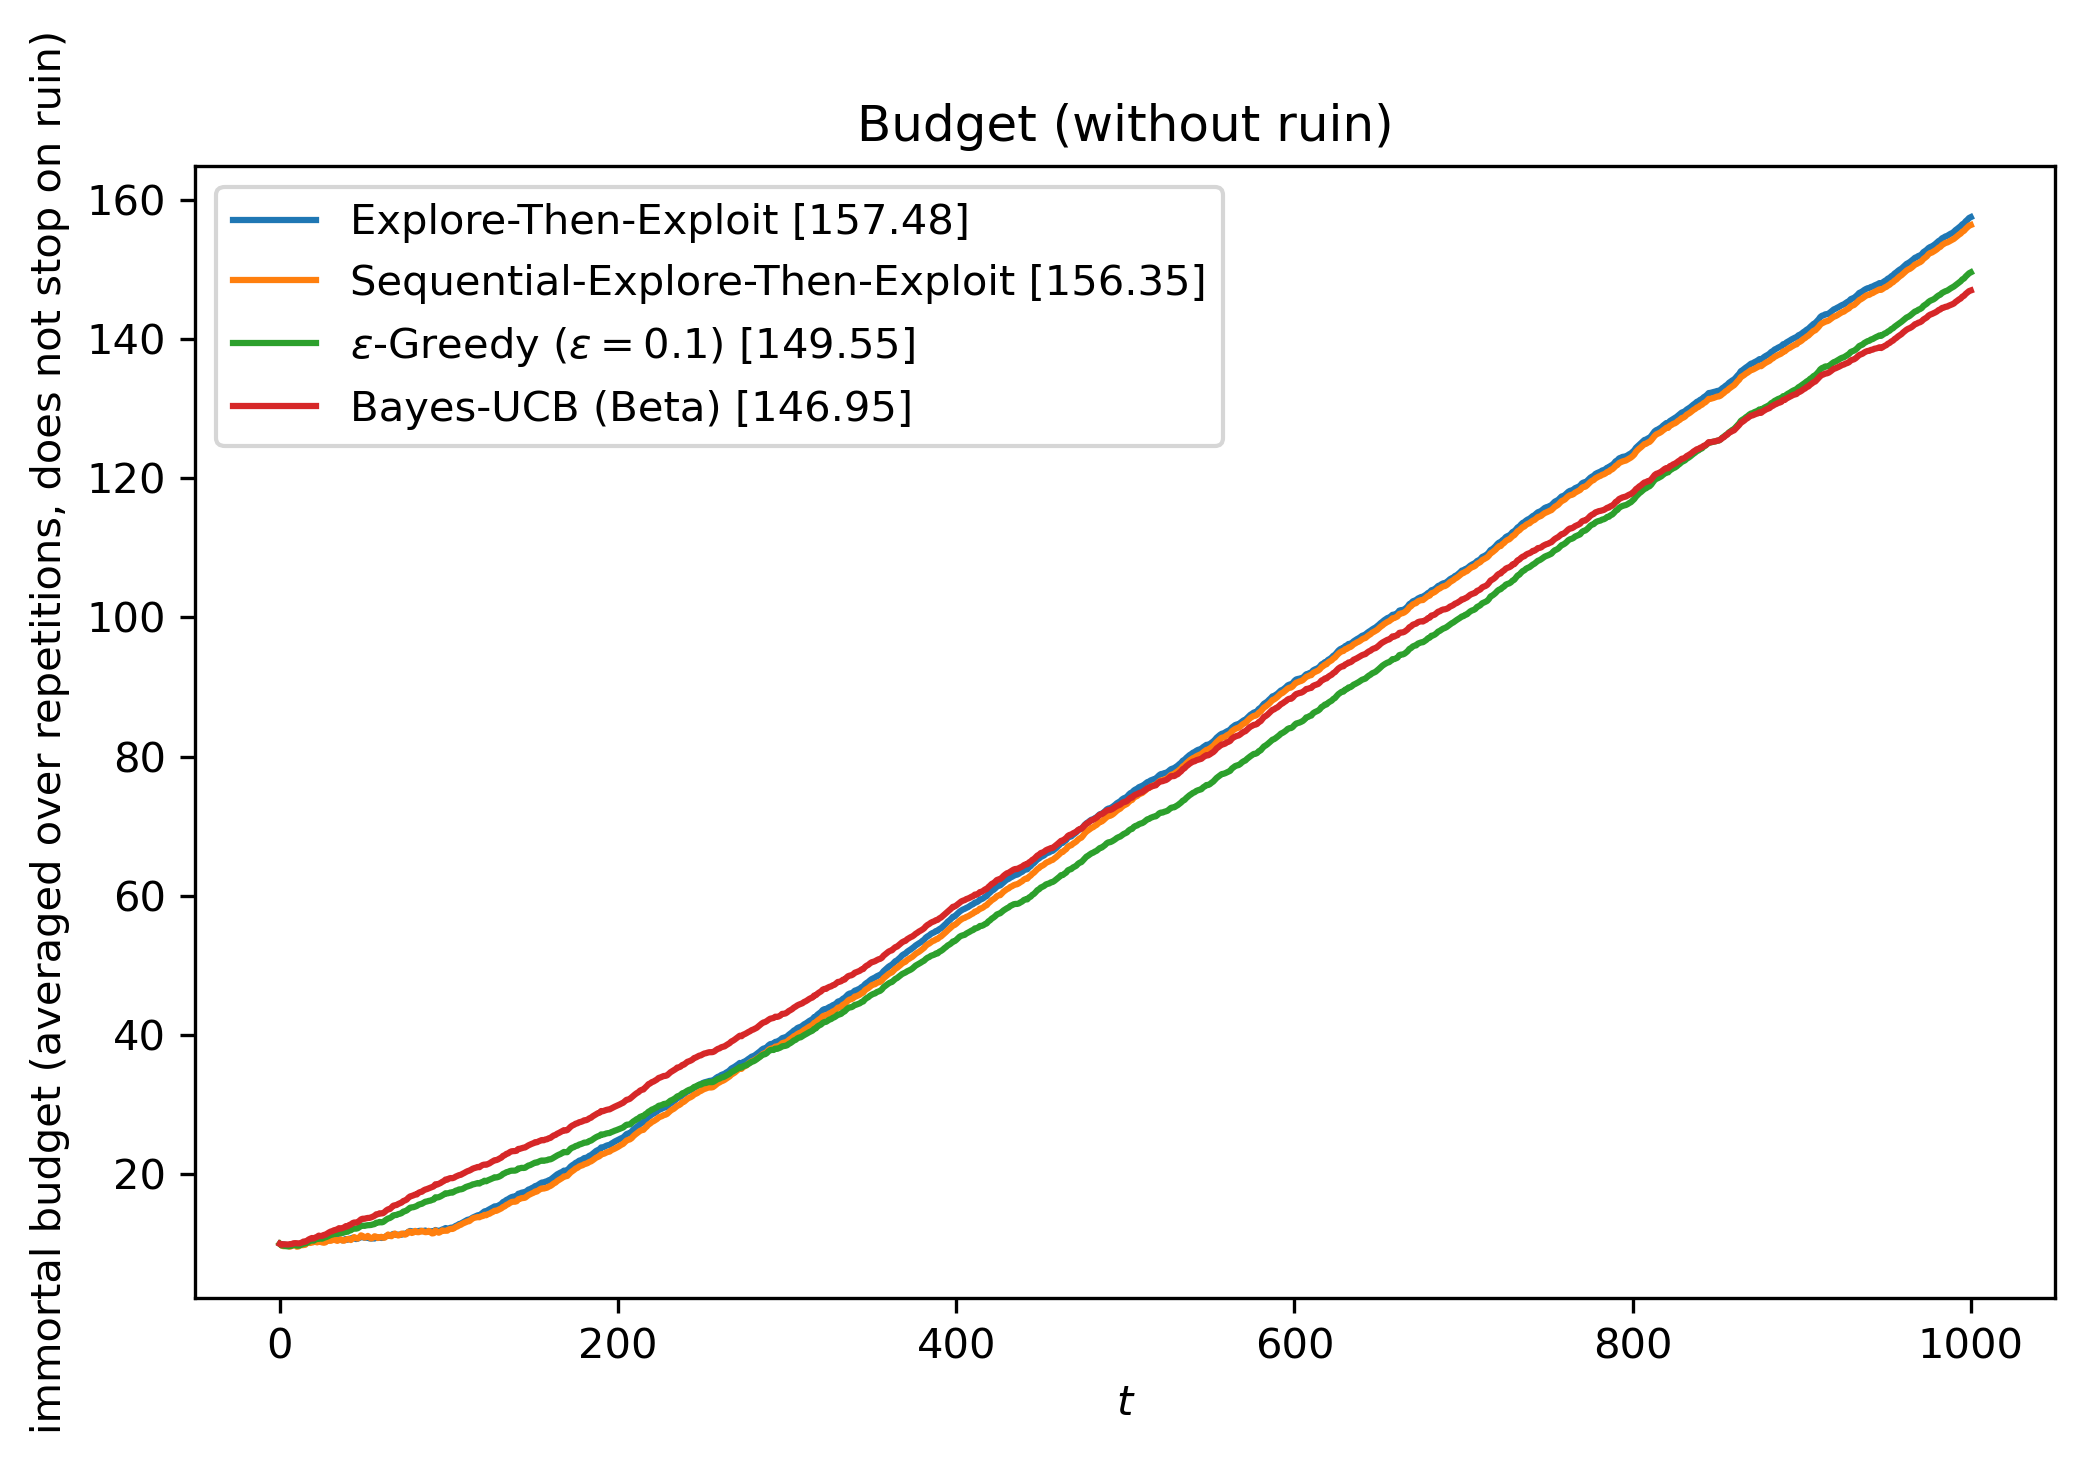

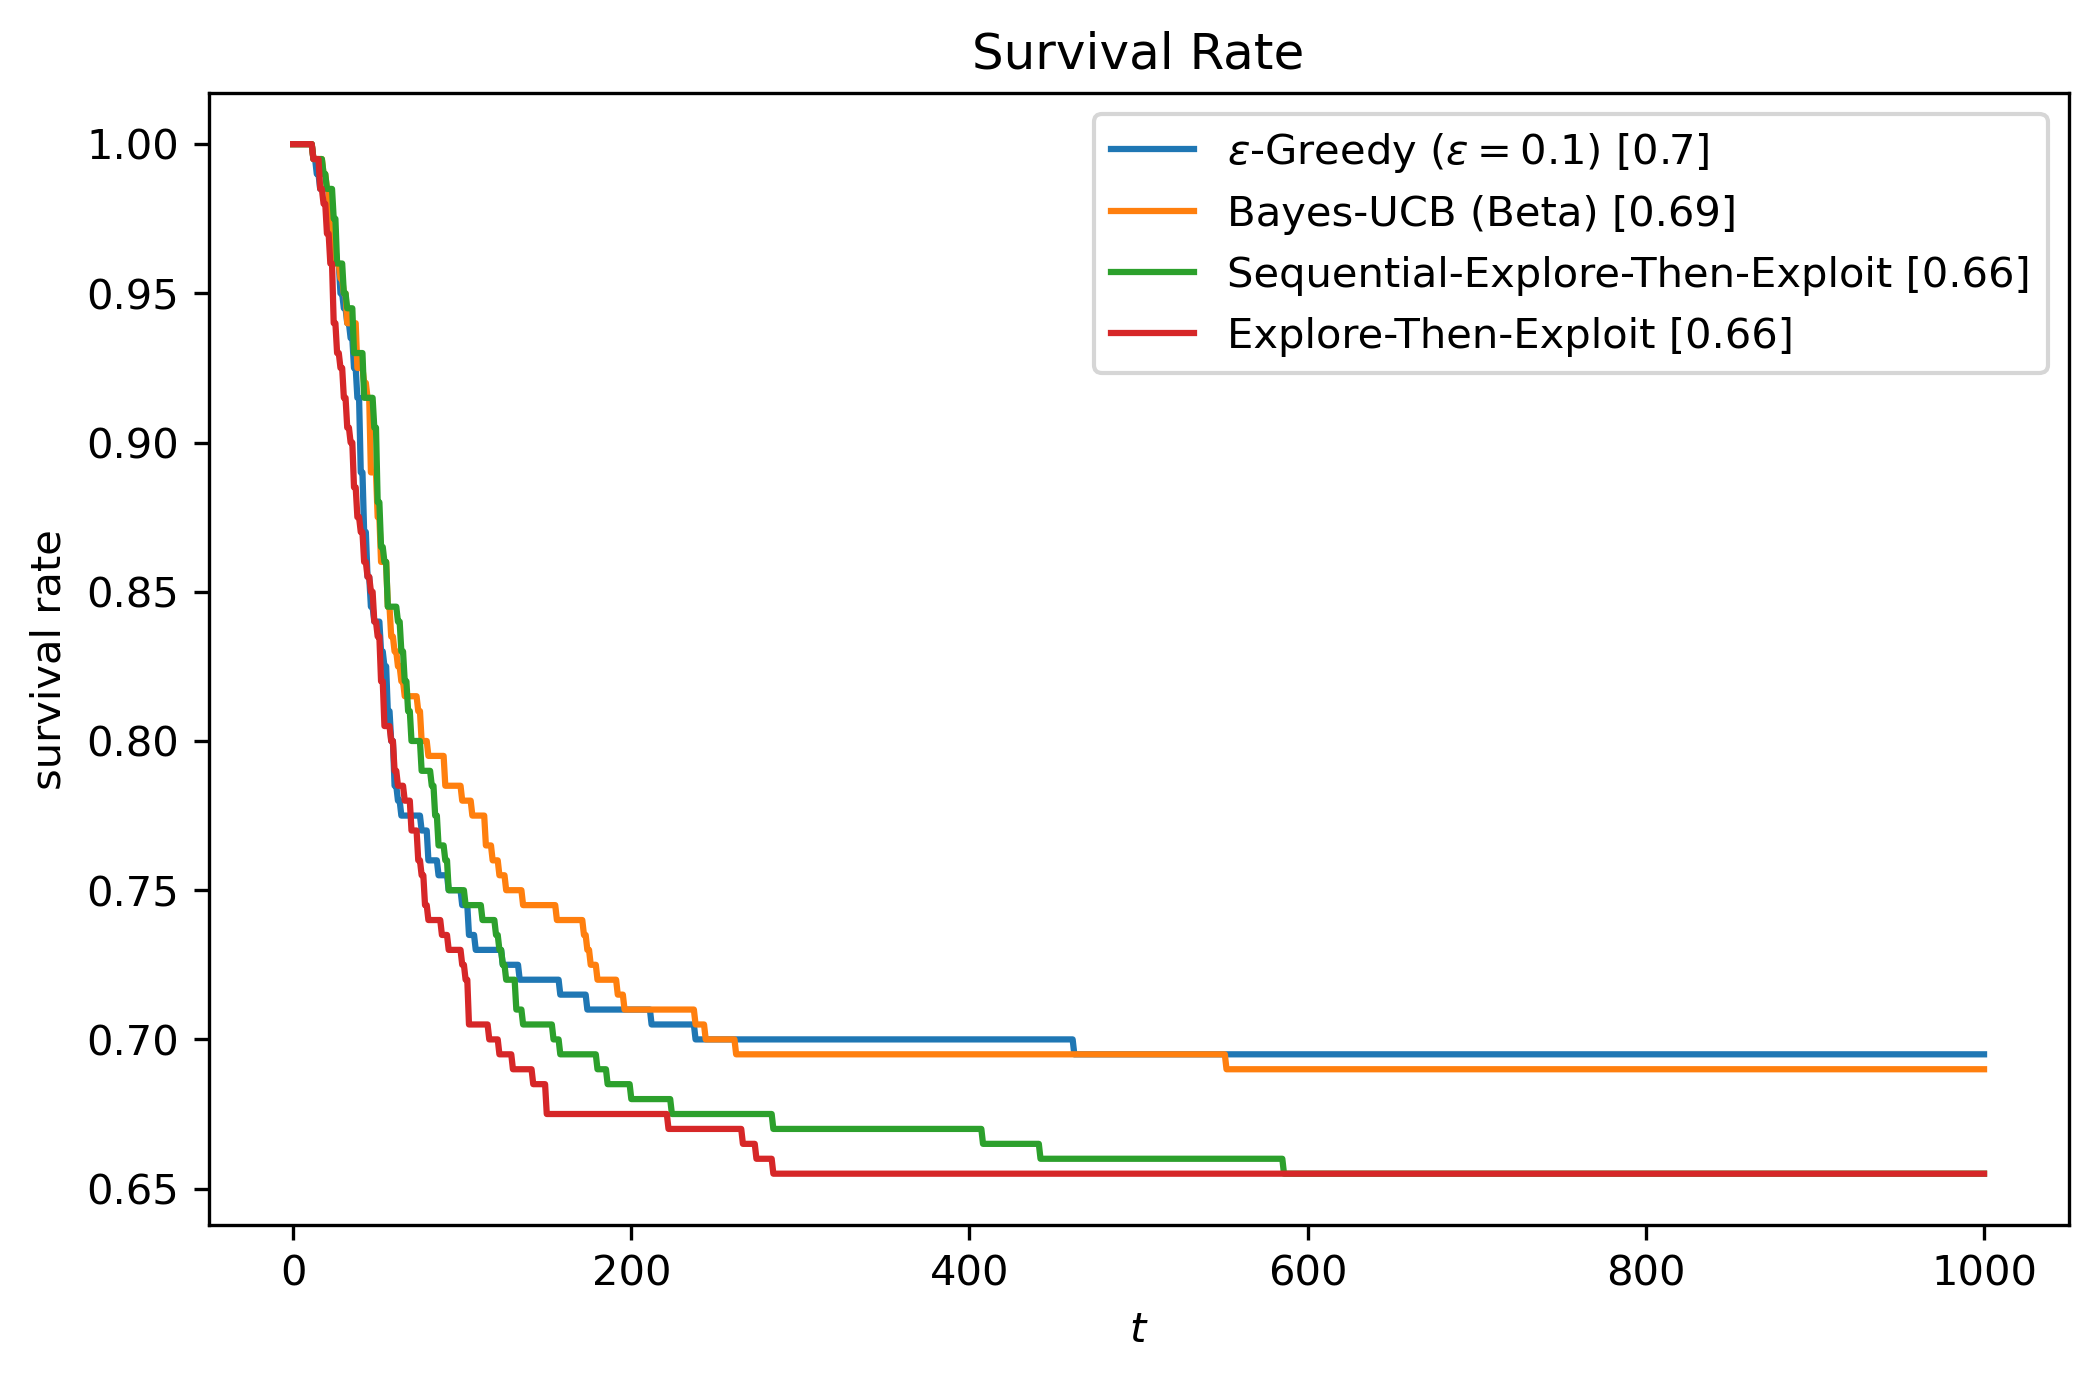

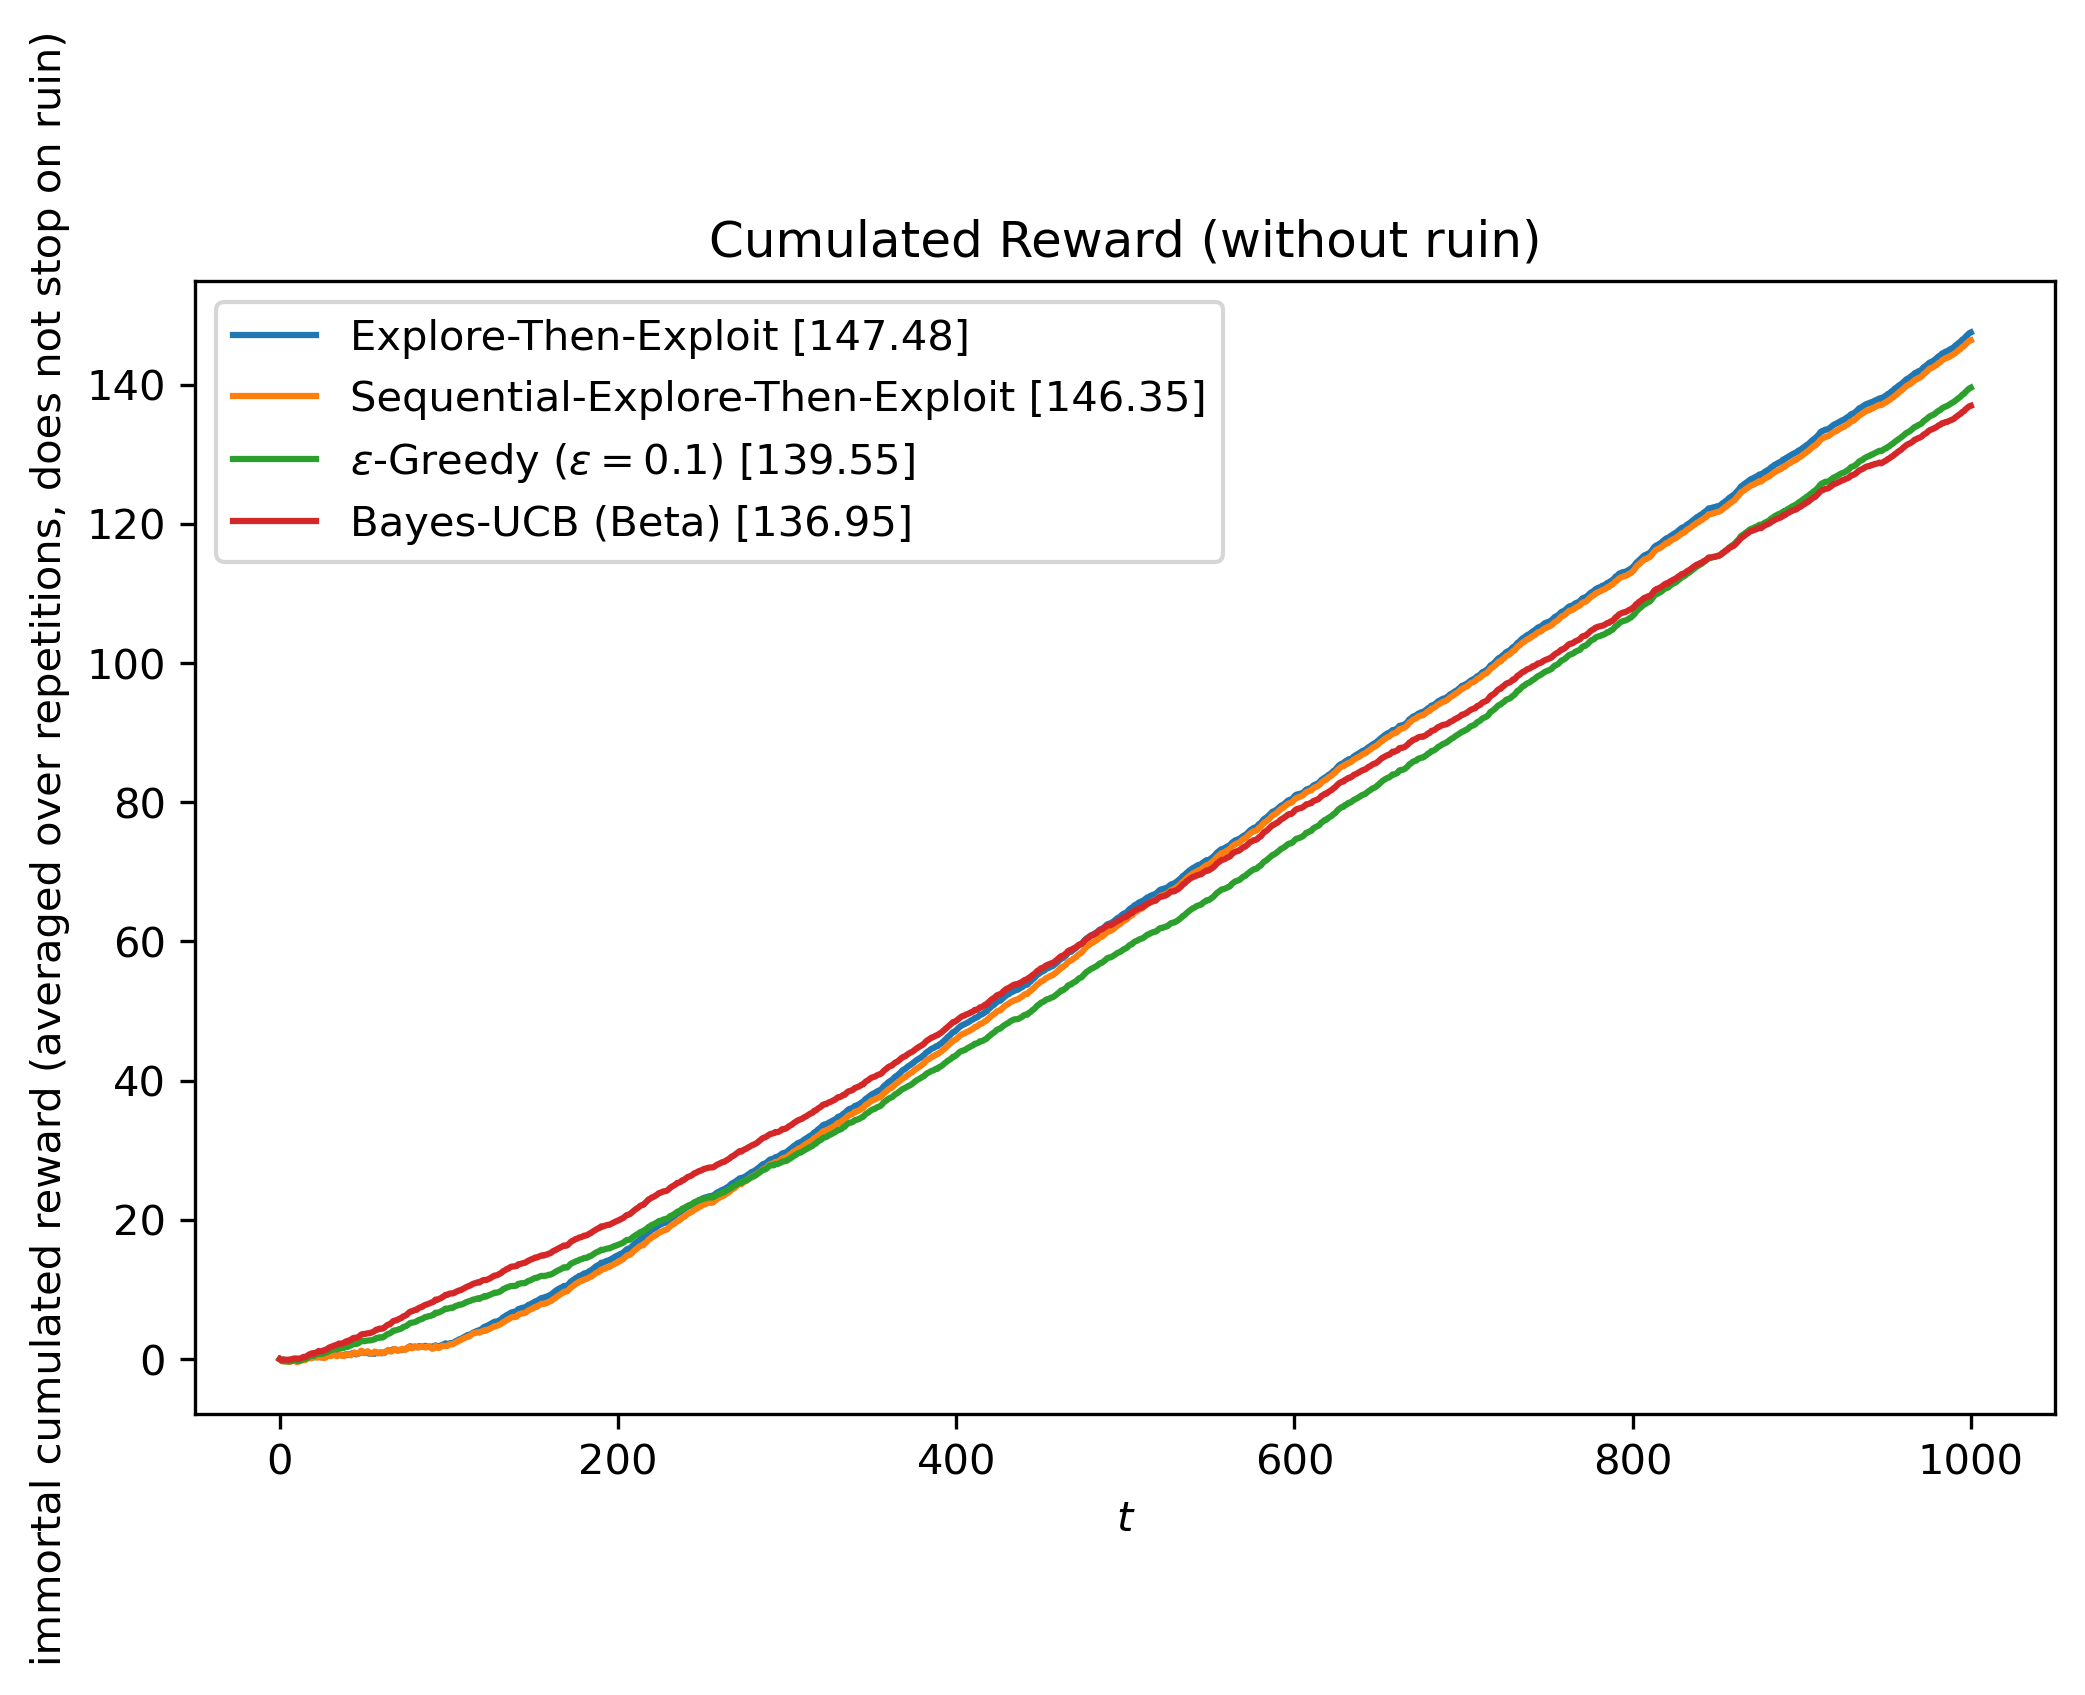

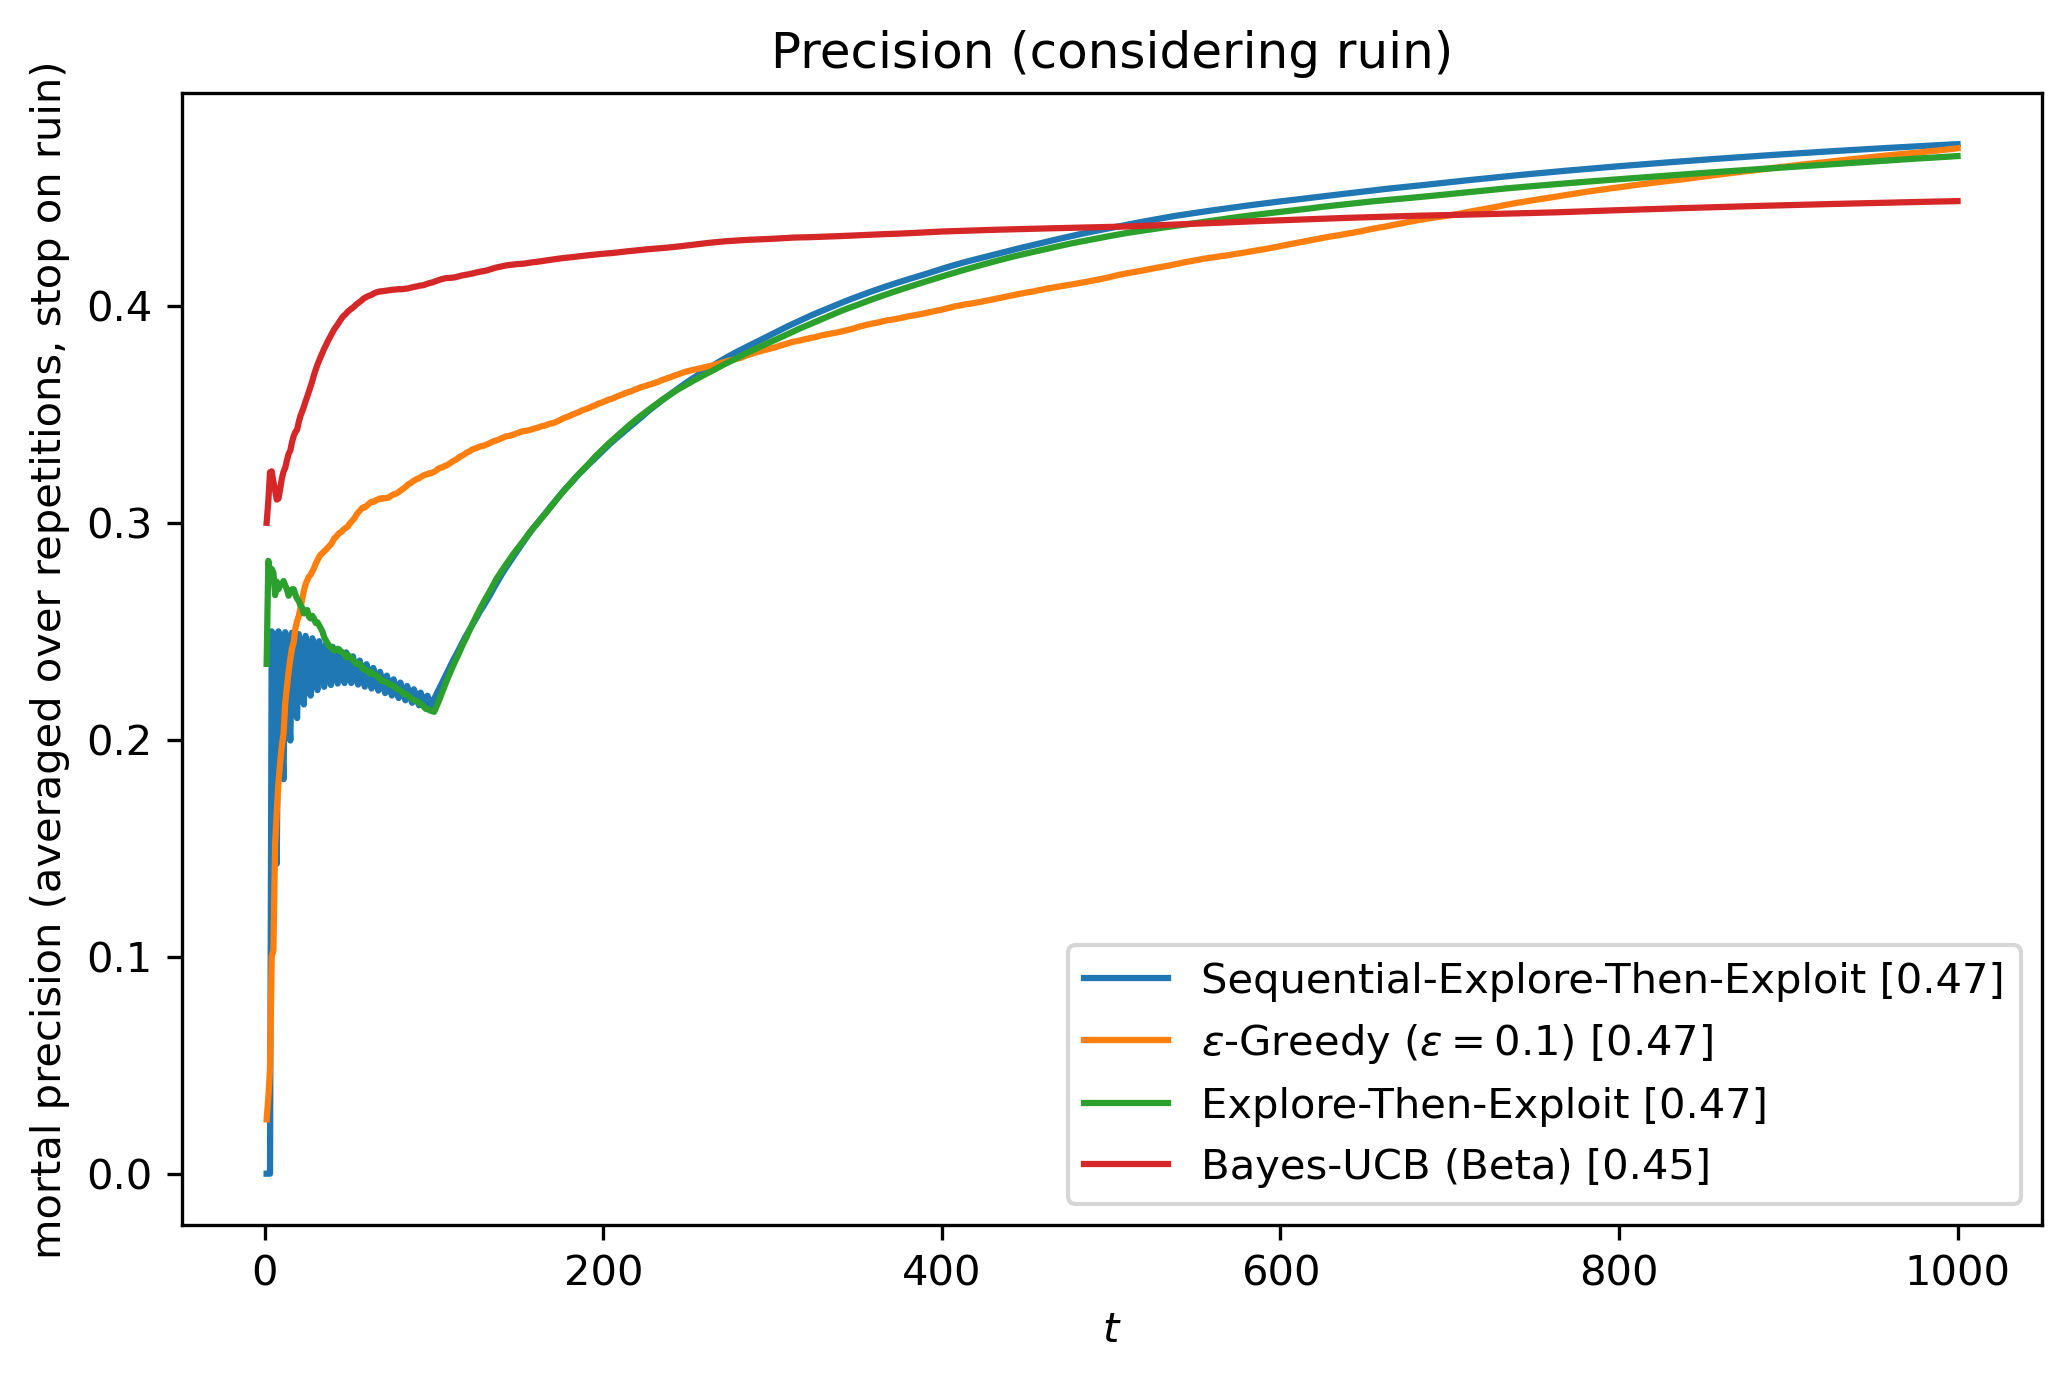

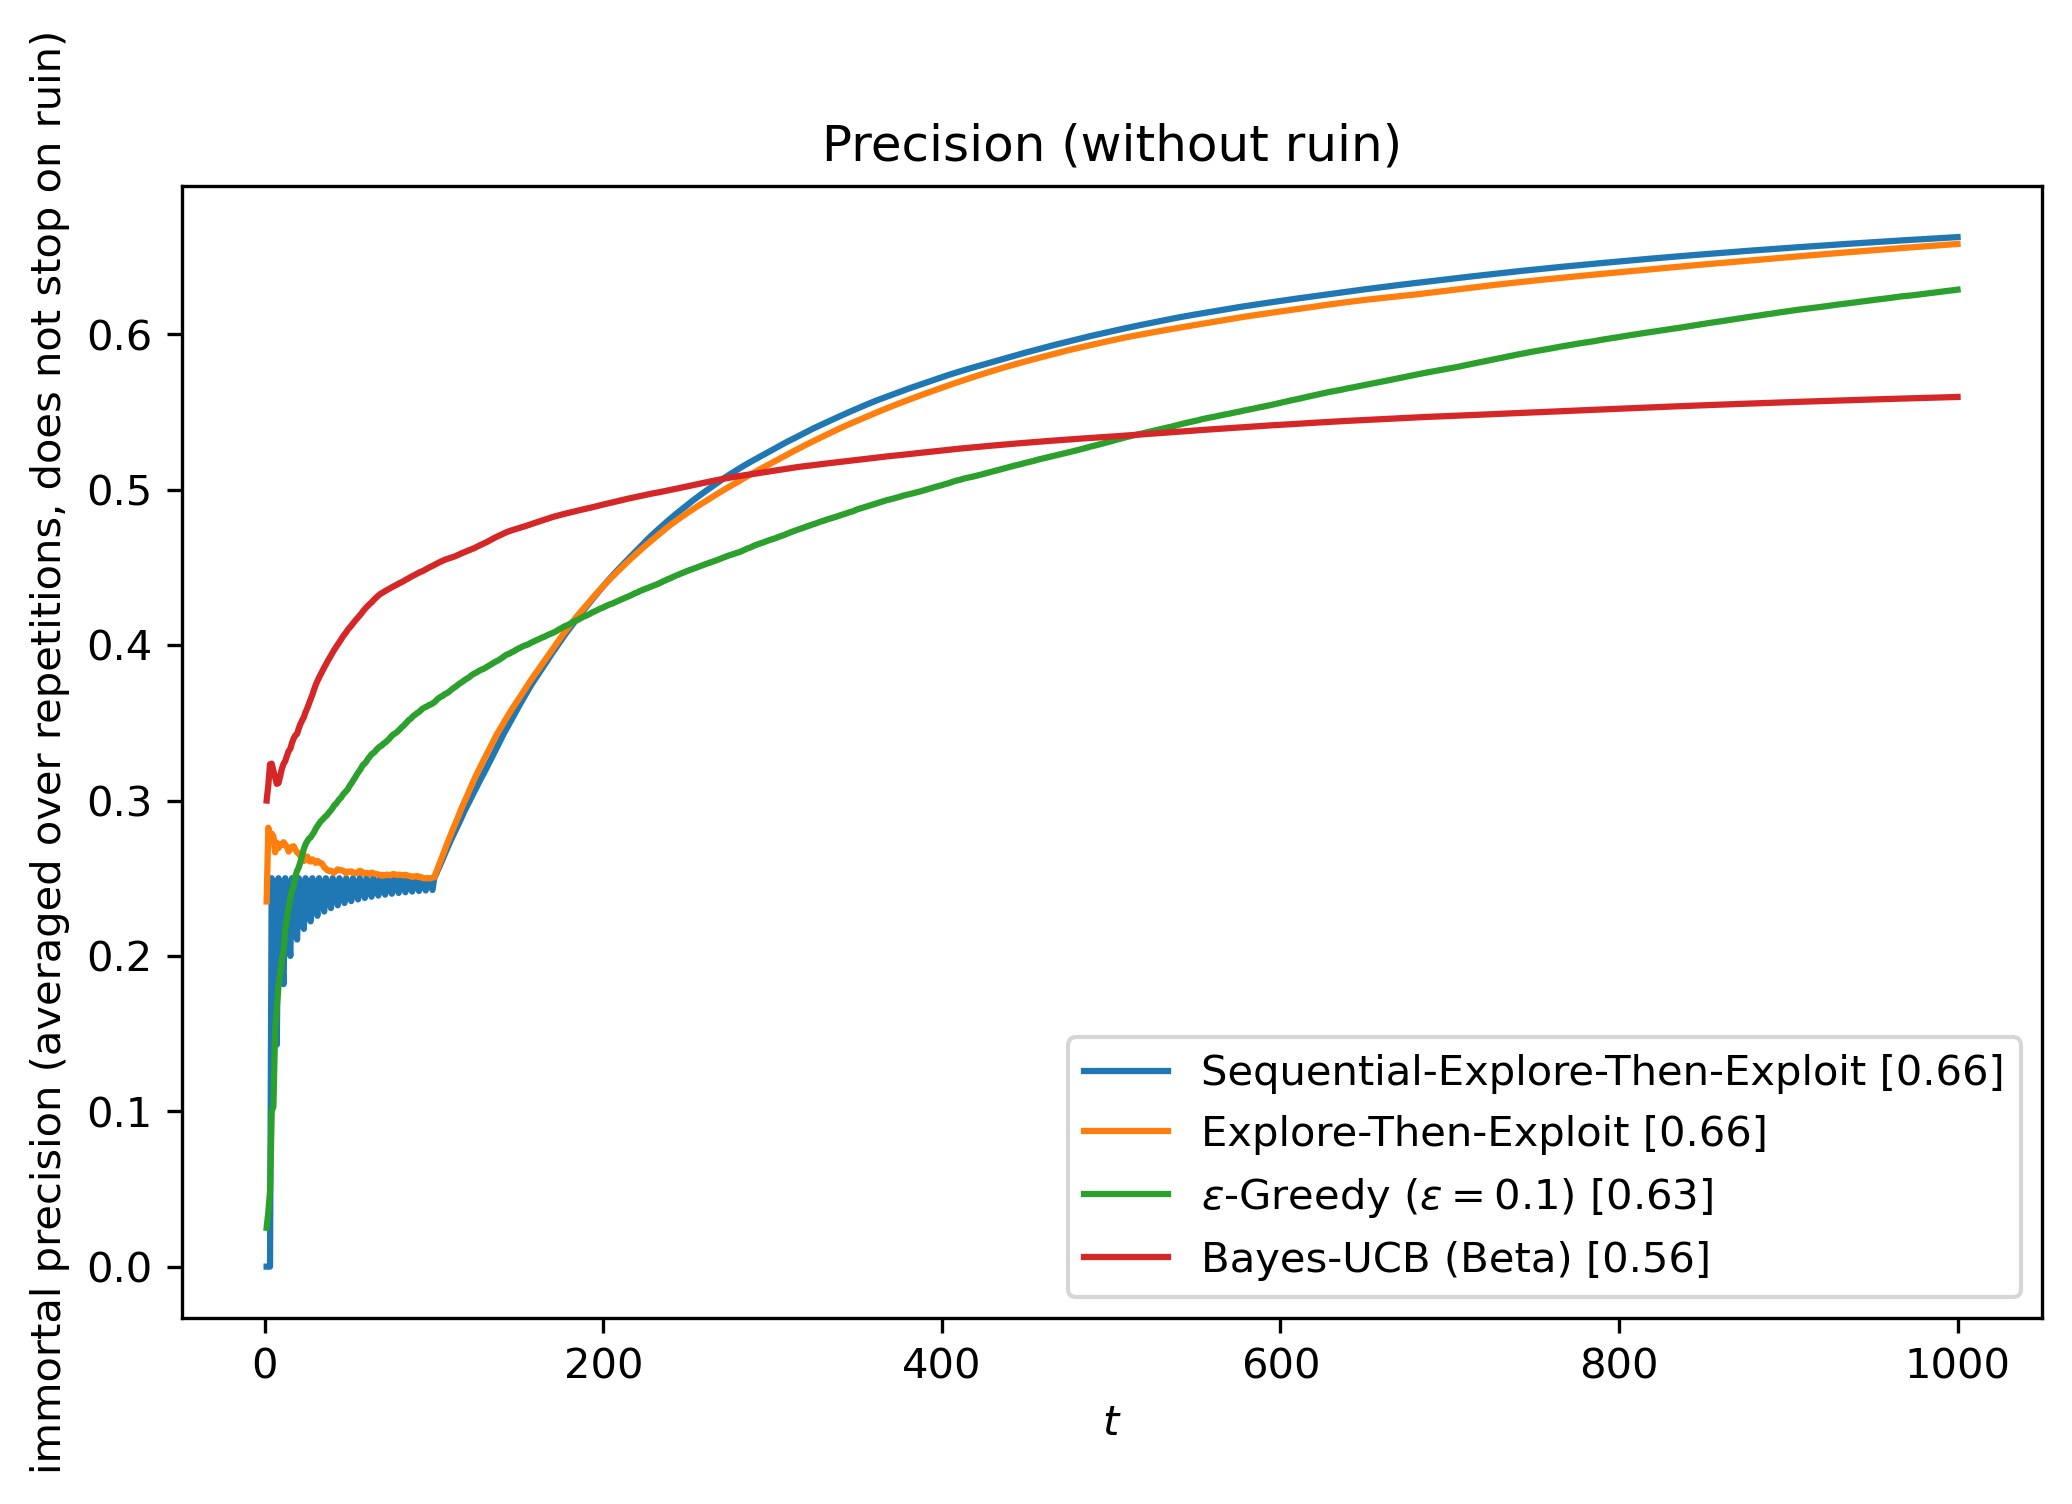

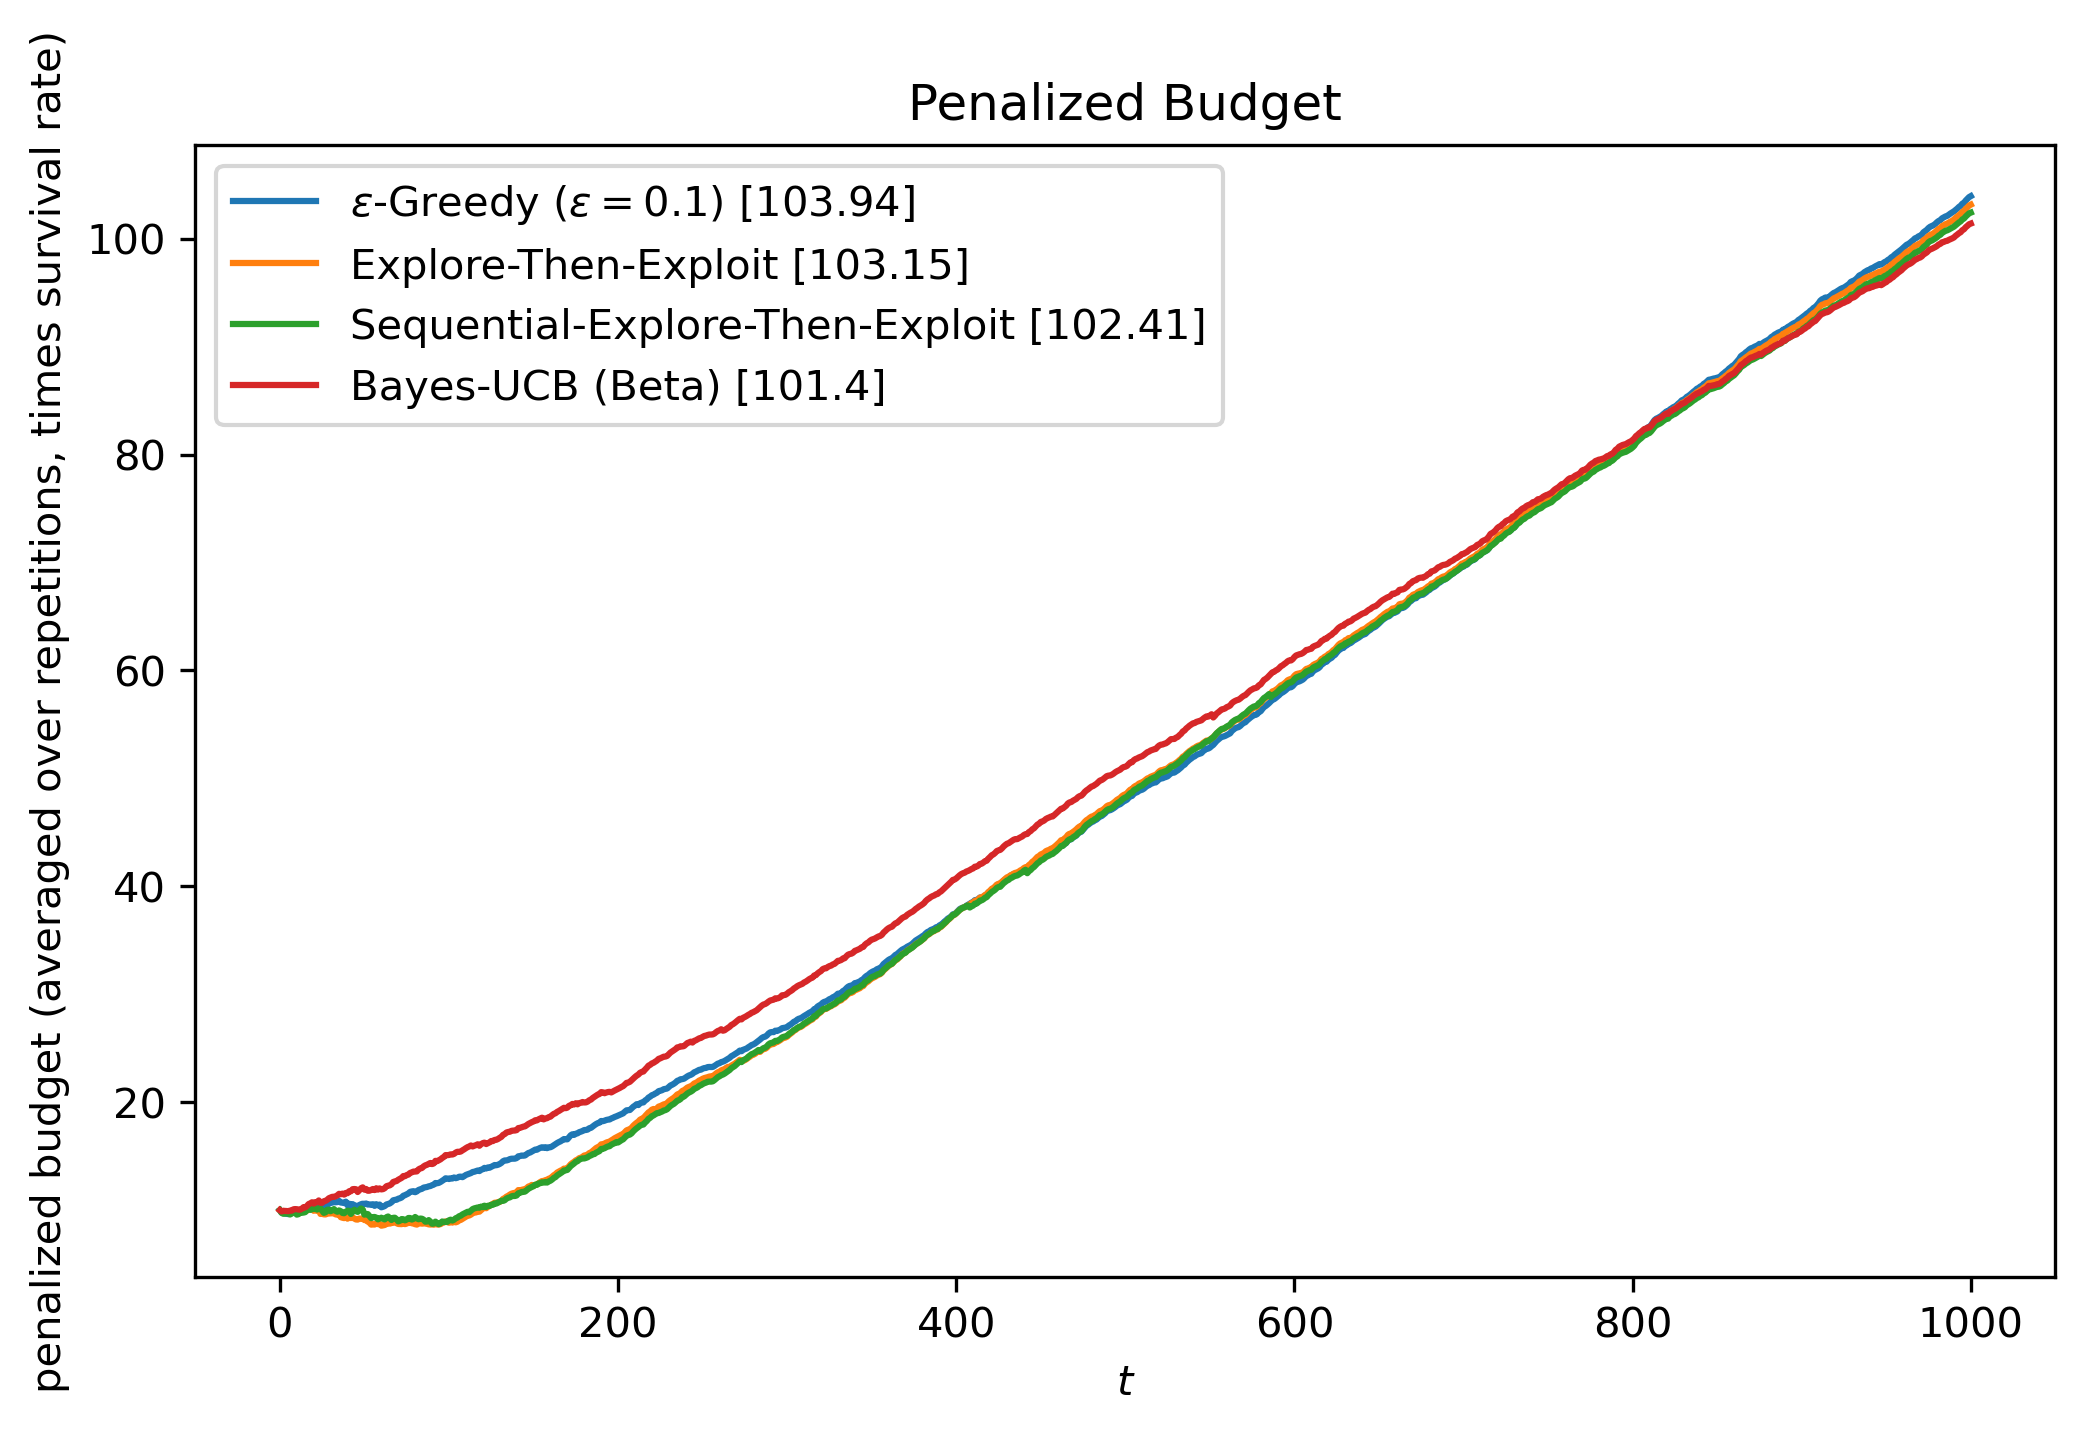

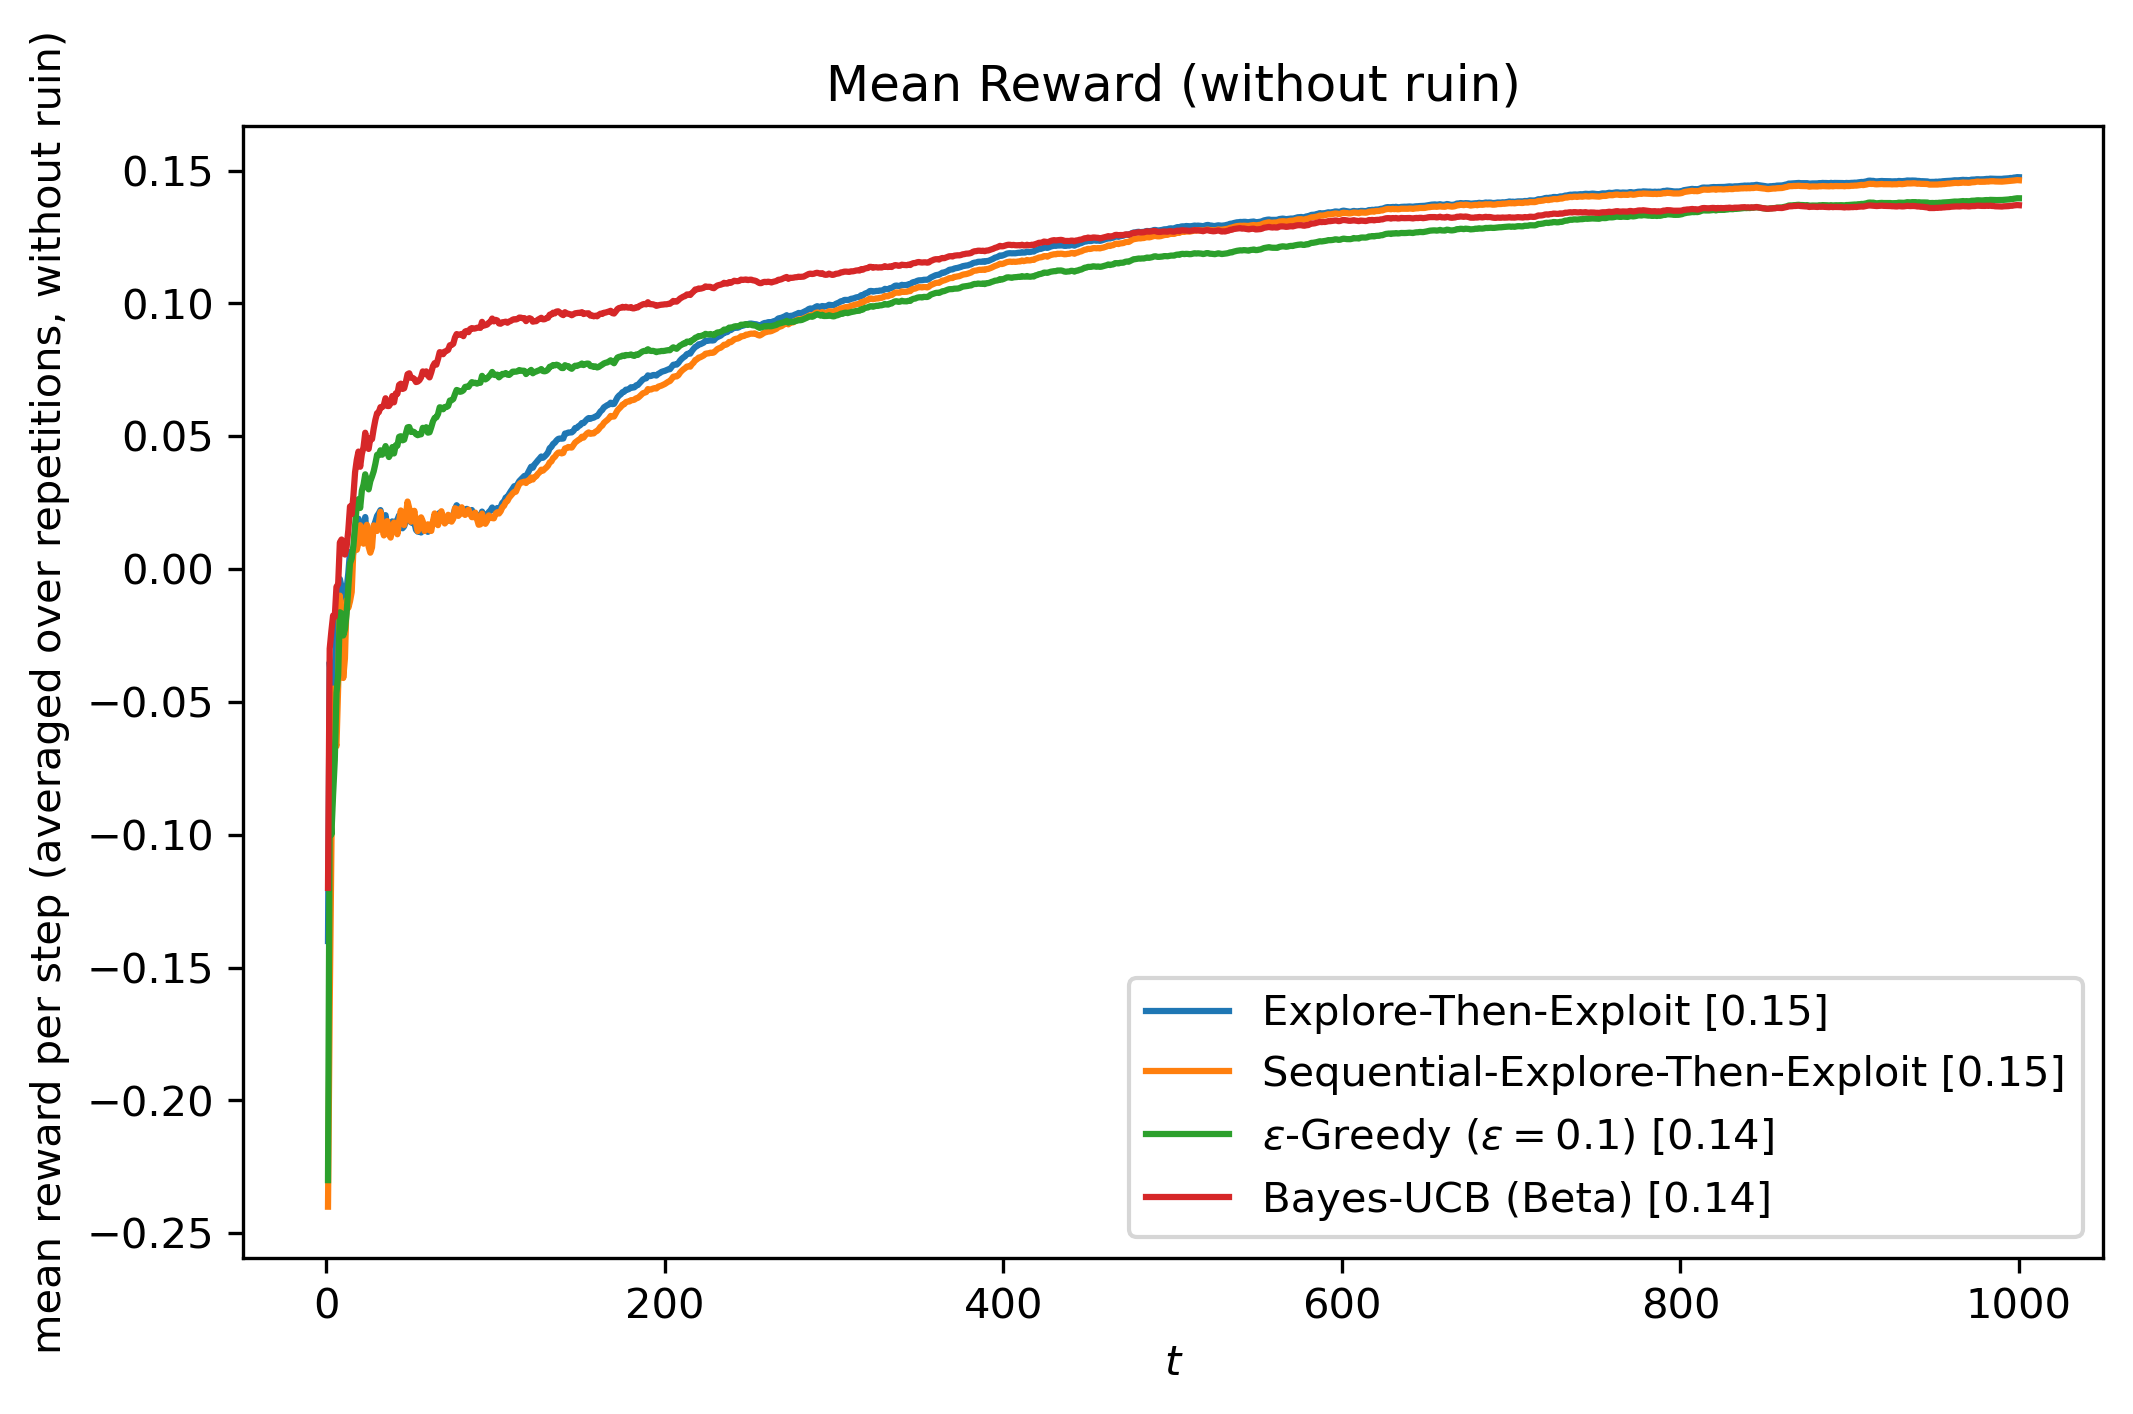

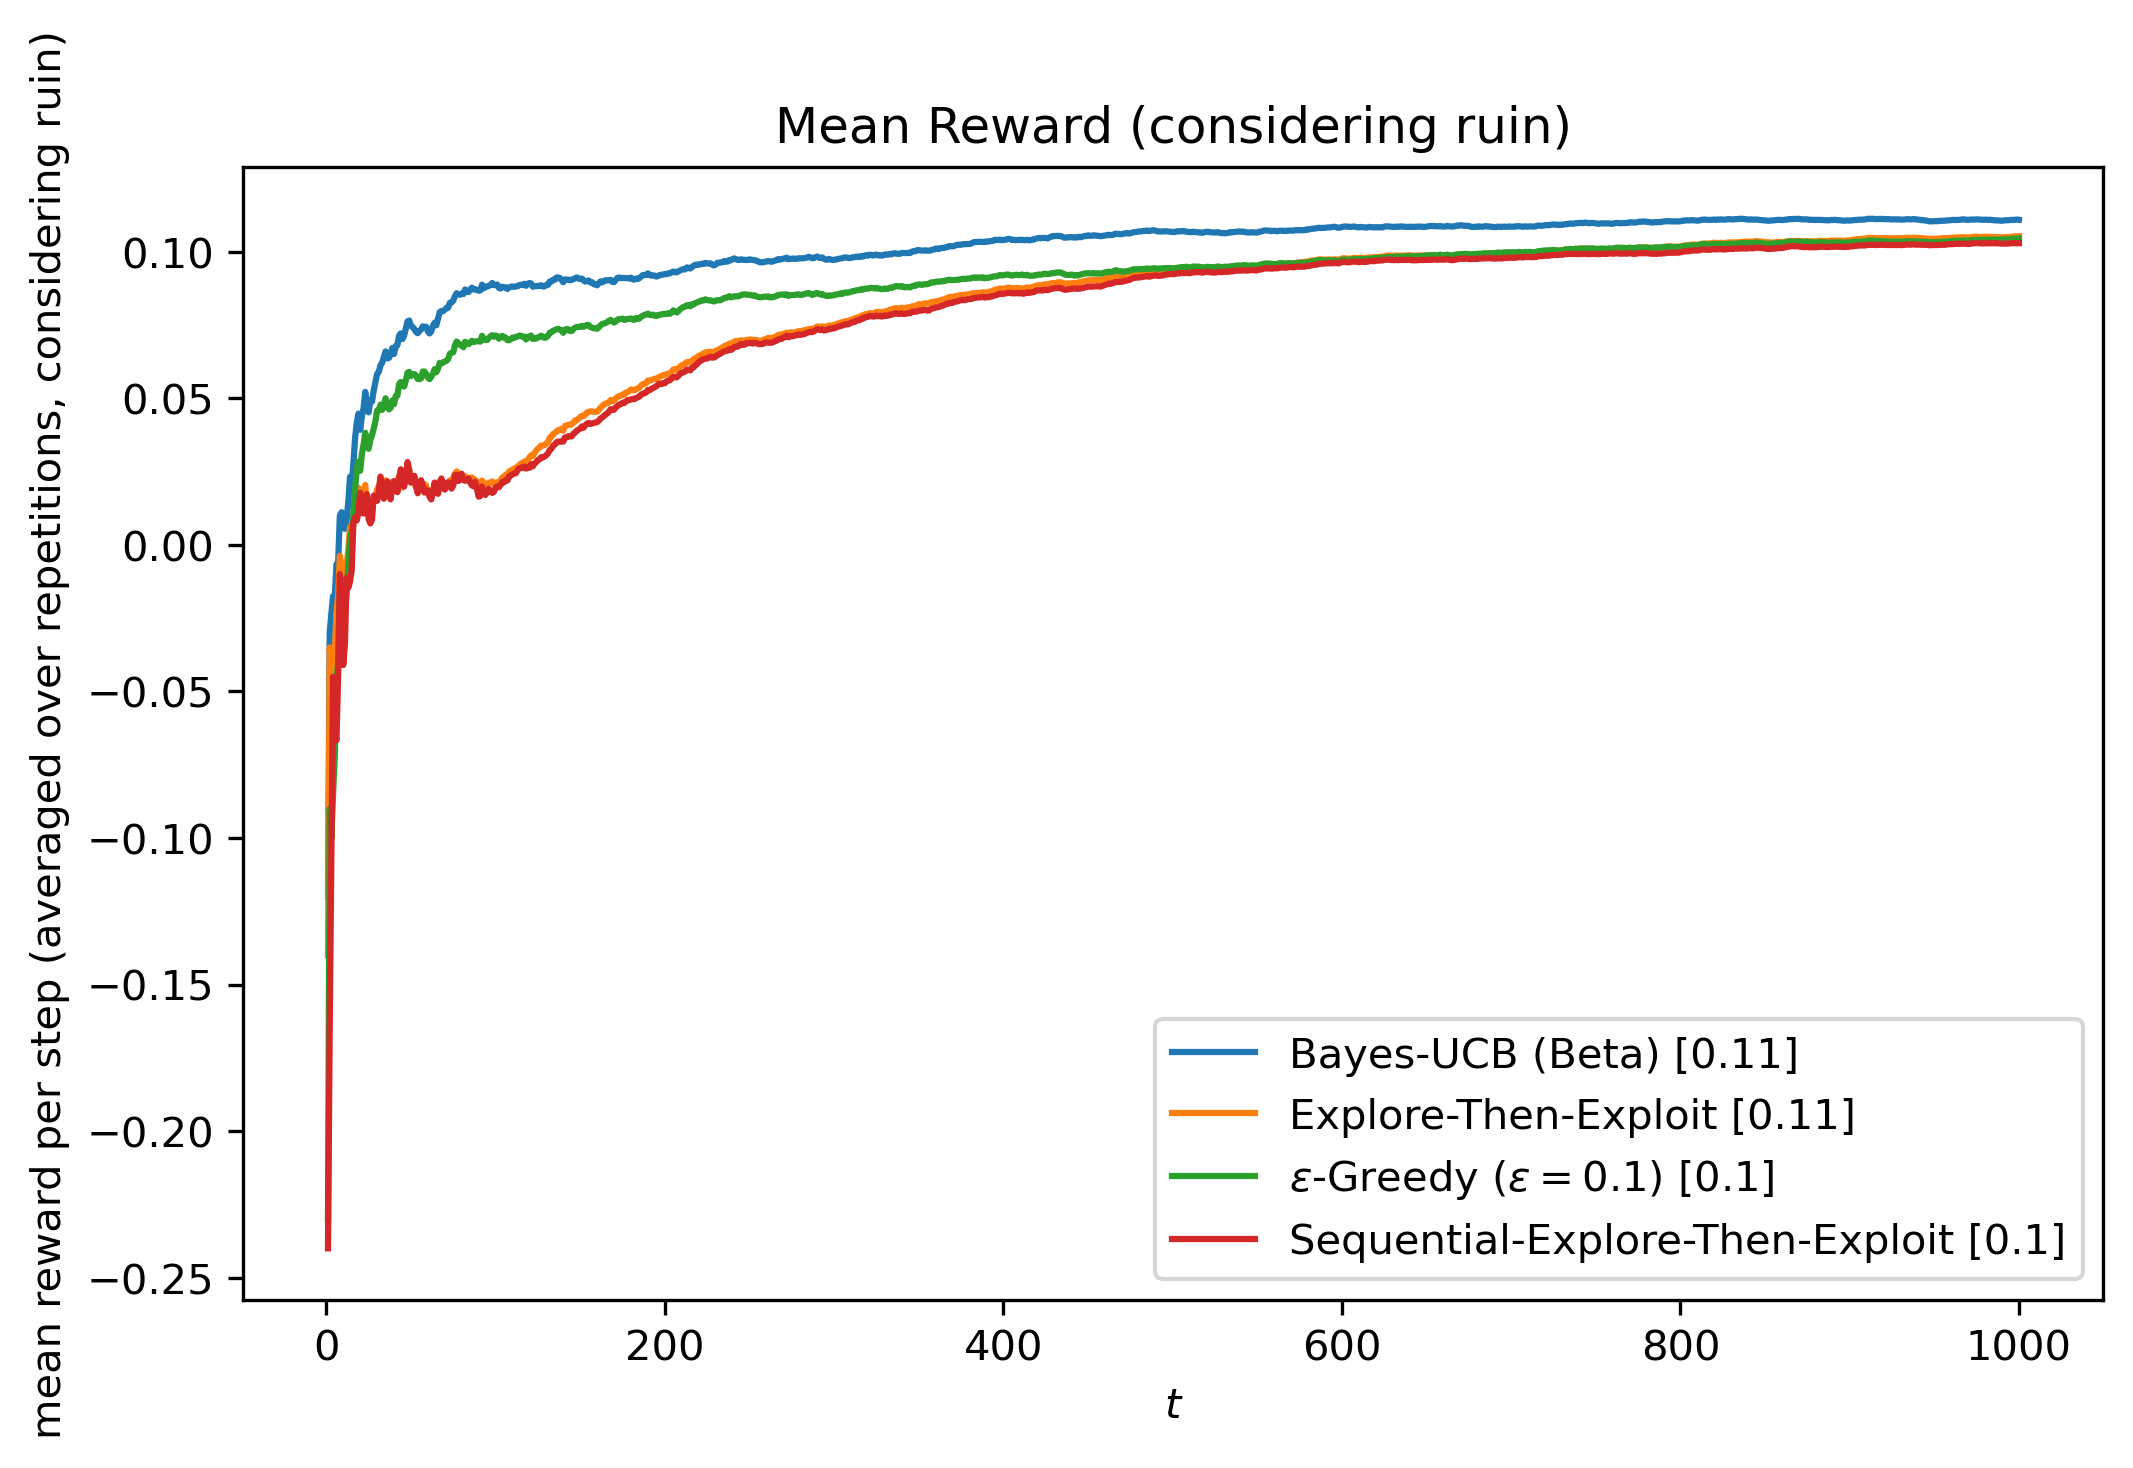

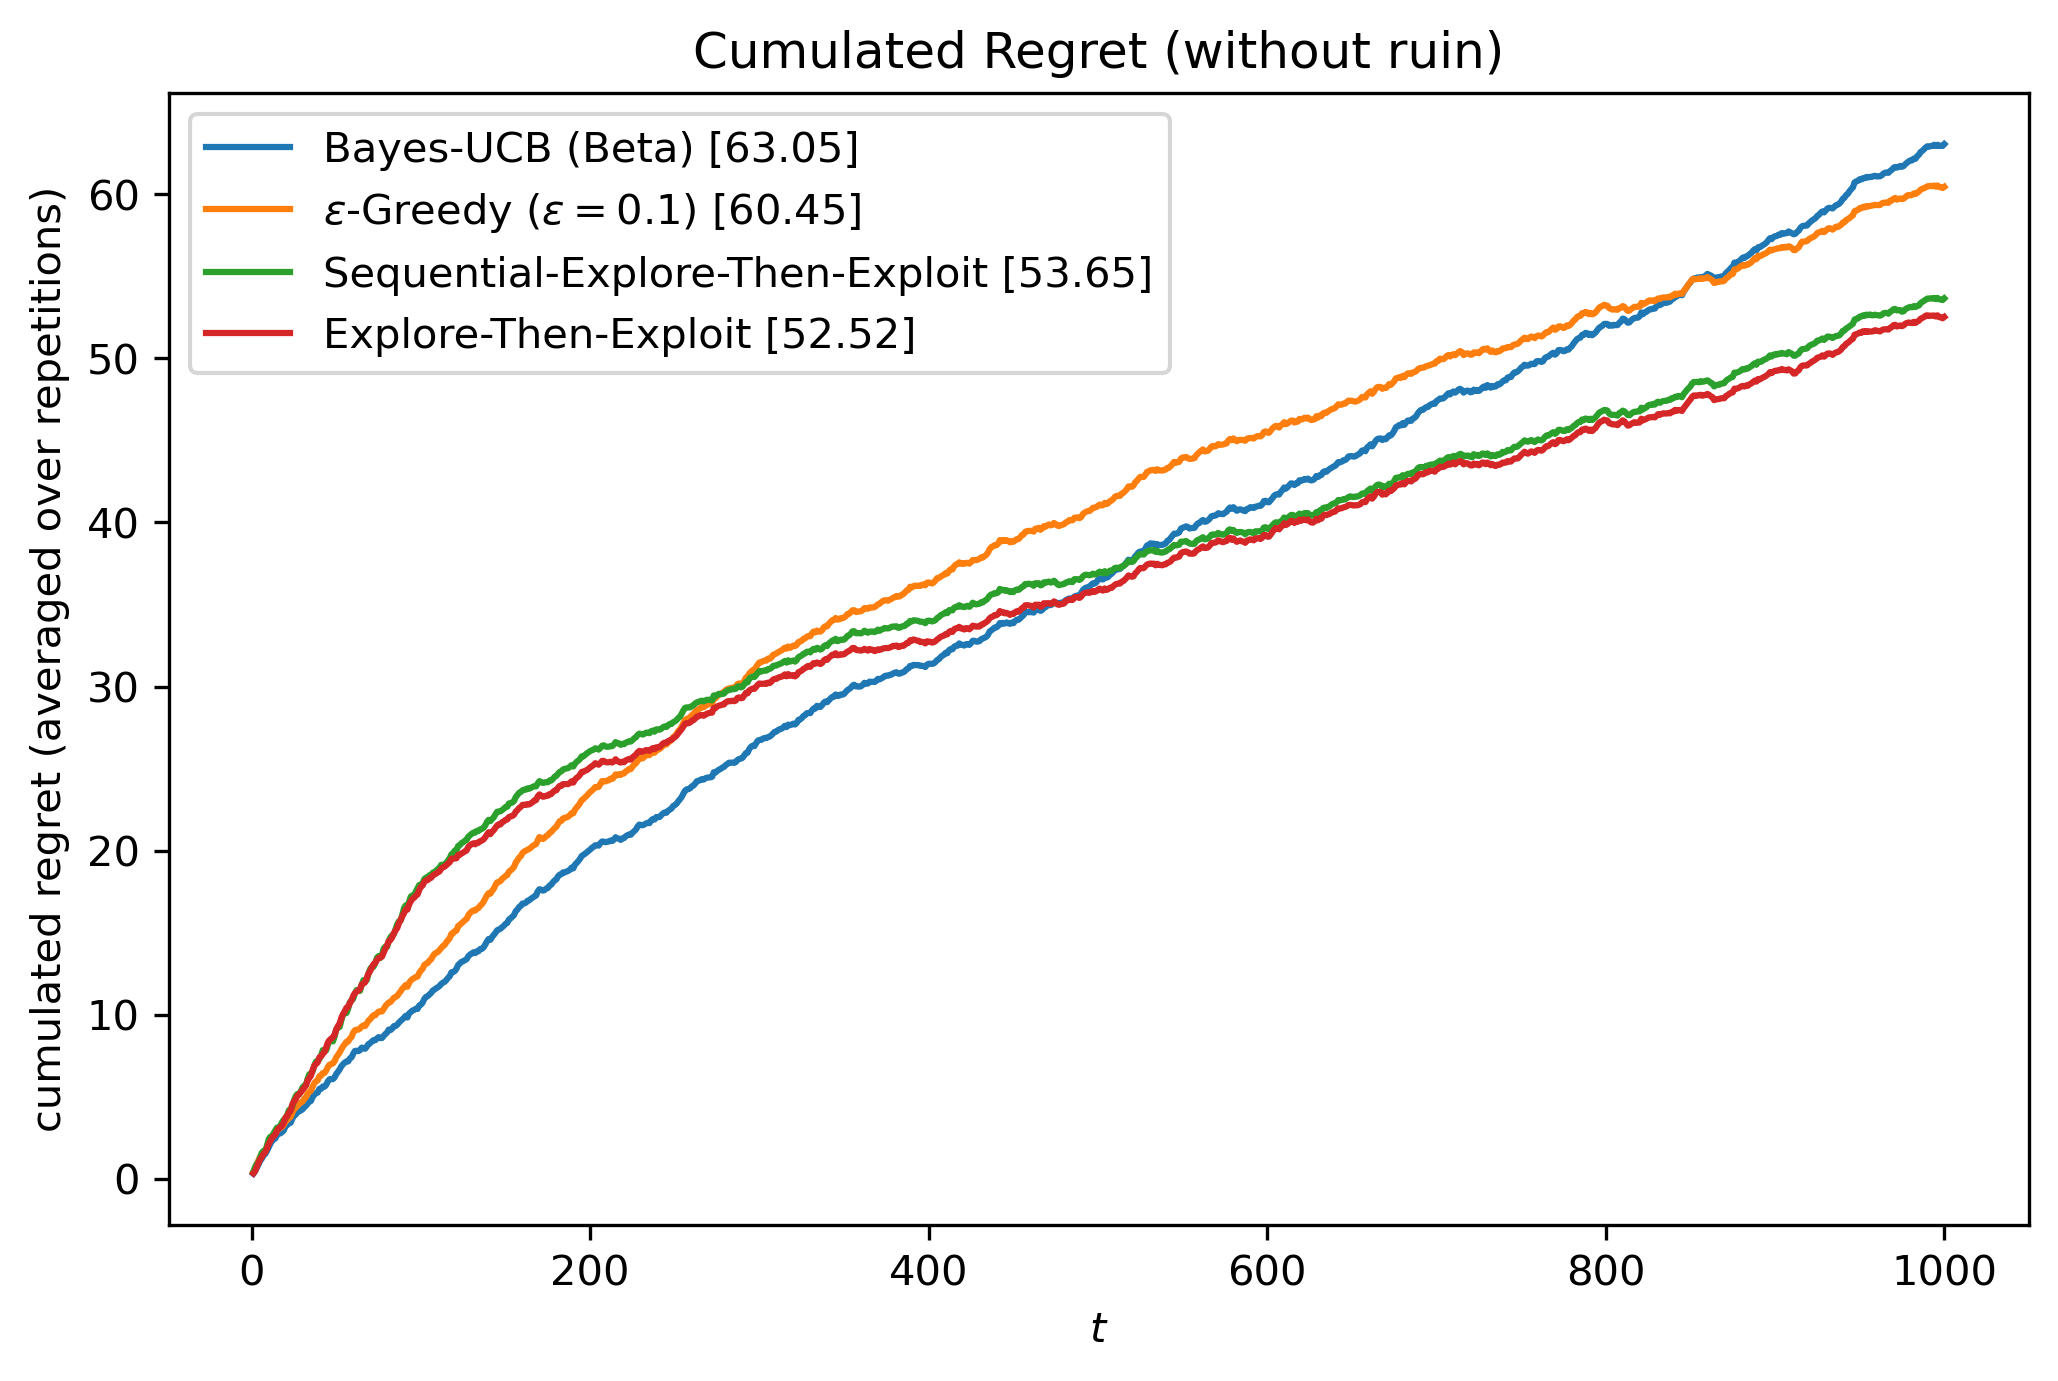

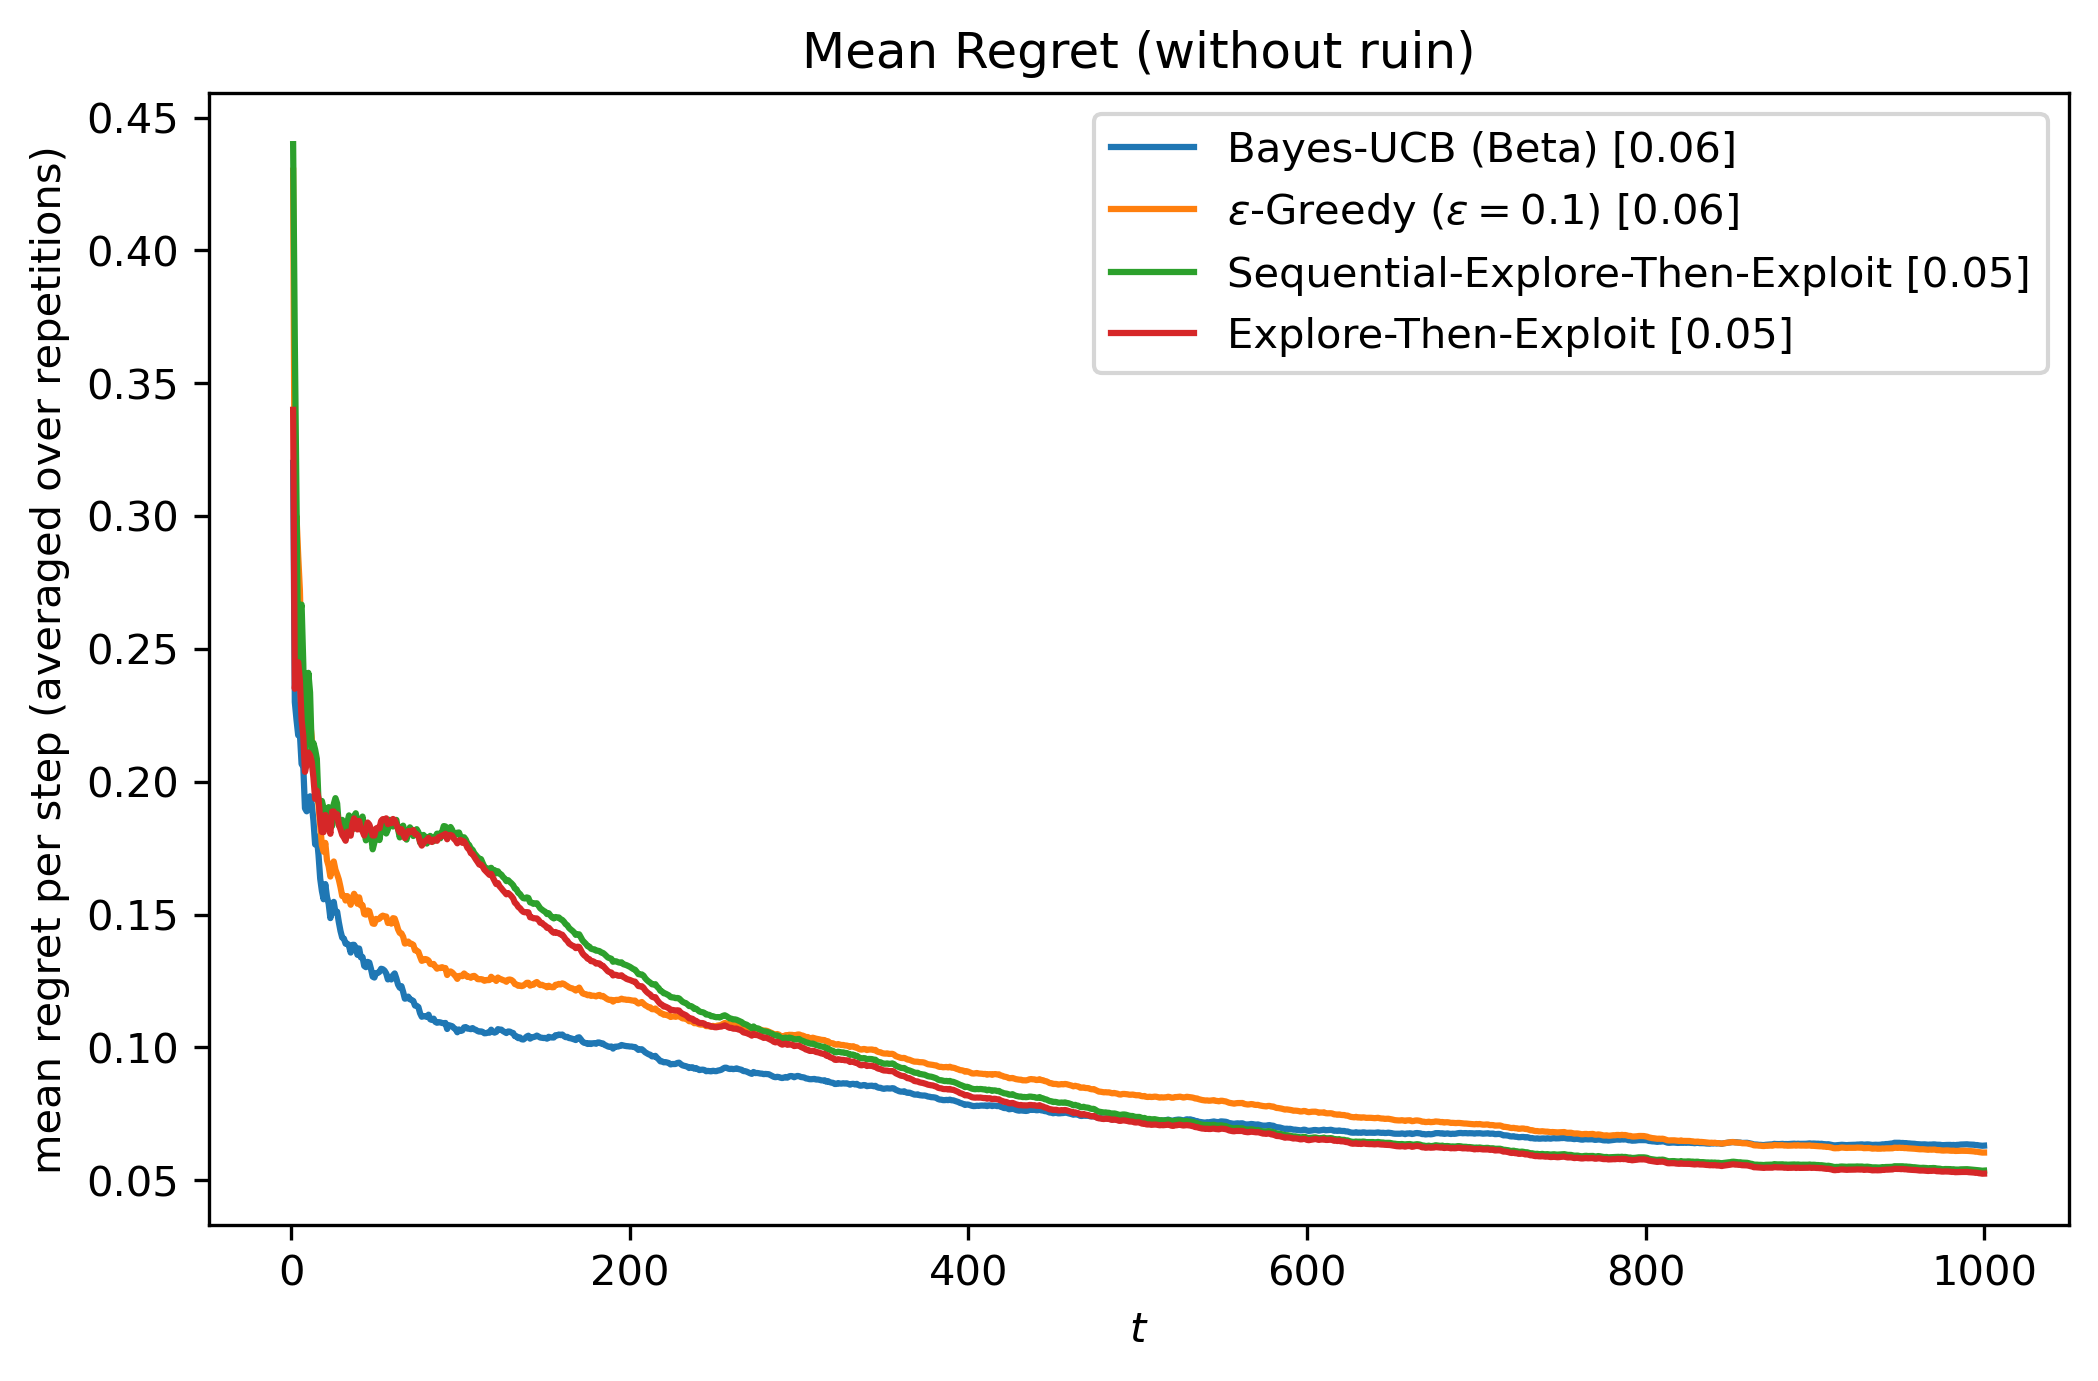

In [7]:
M.plot('mortal_budget')
M.plot('immortal_budget')
M.plot('survival')
M.plot('sum_reward')
M.plot('mortal_precision')
M.plot('immortal_precision')
M.plot('penalized_budget')
M.plot('avg_reward')
M.plot('avg_mortal_reward')
M.plot('sum_regret')
M.plot('avg_regret')

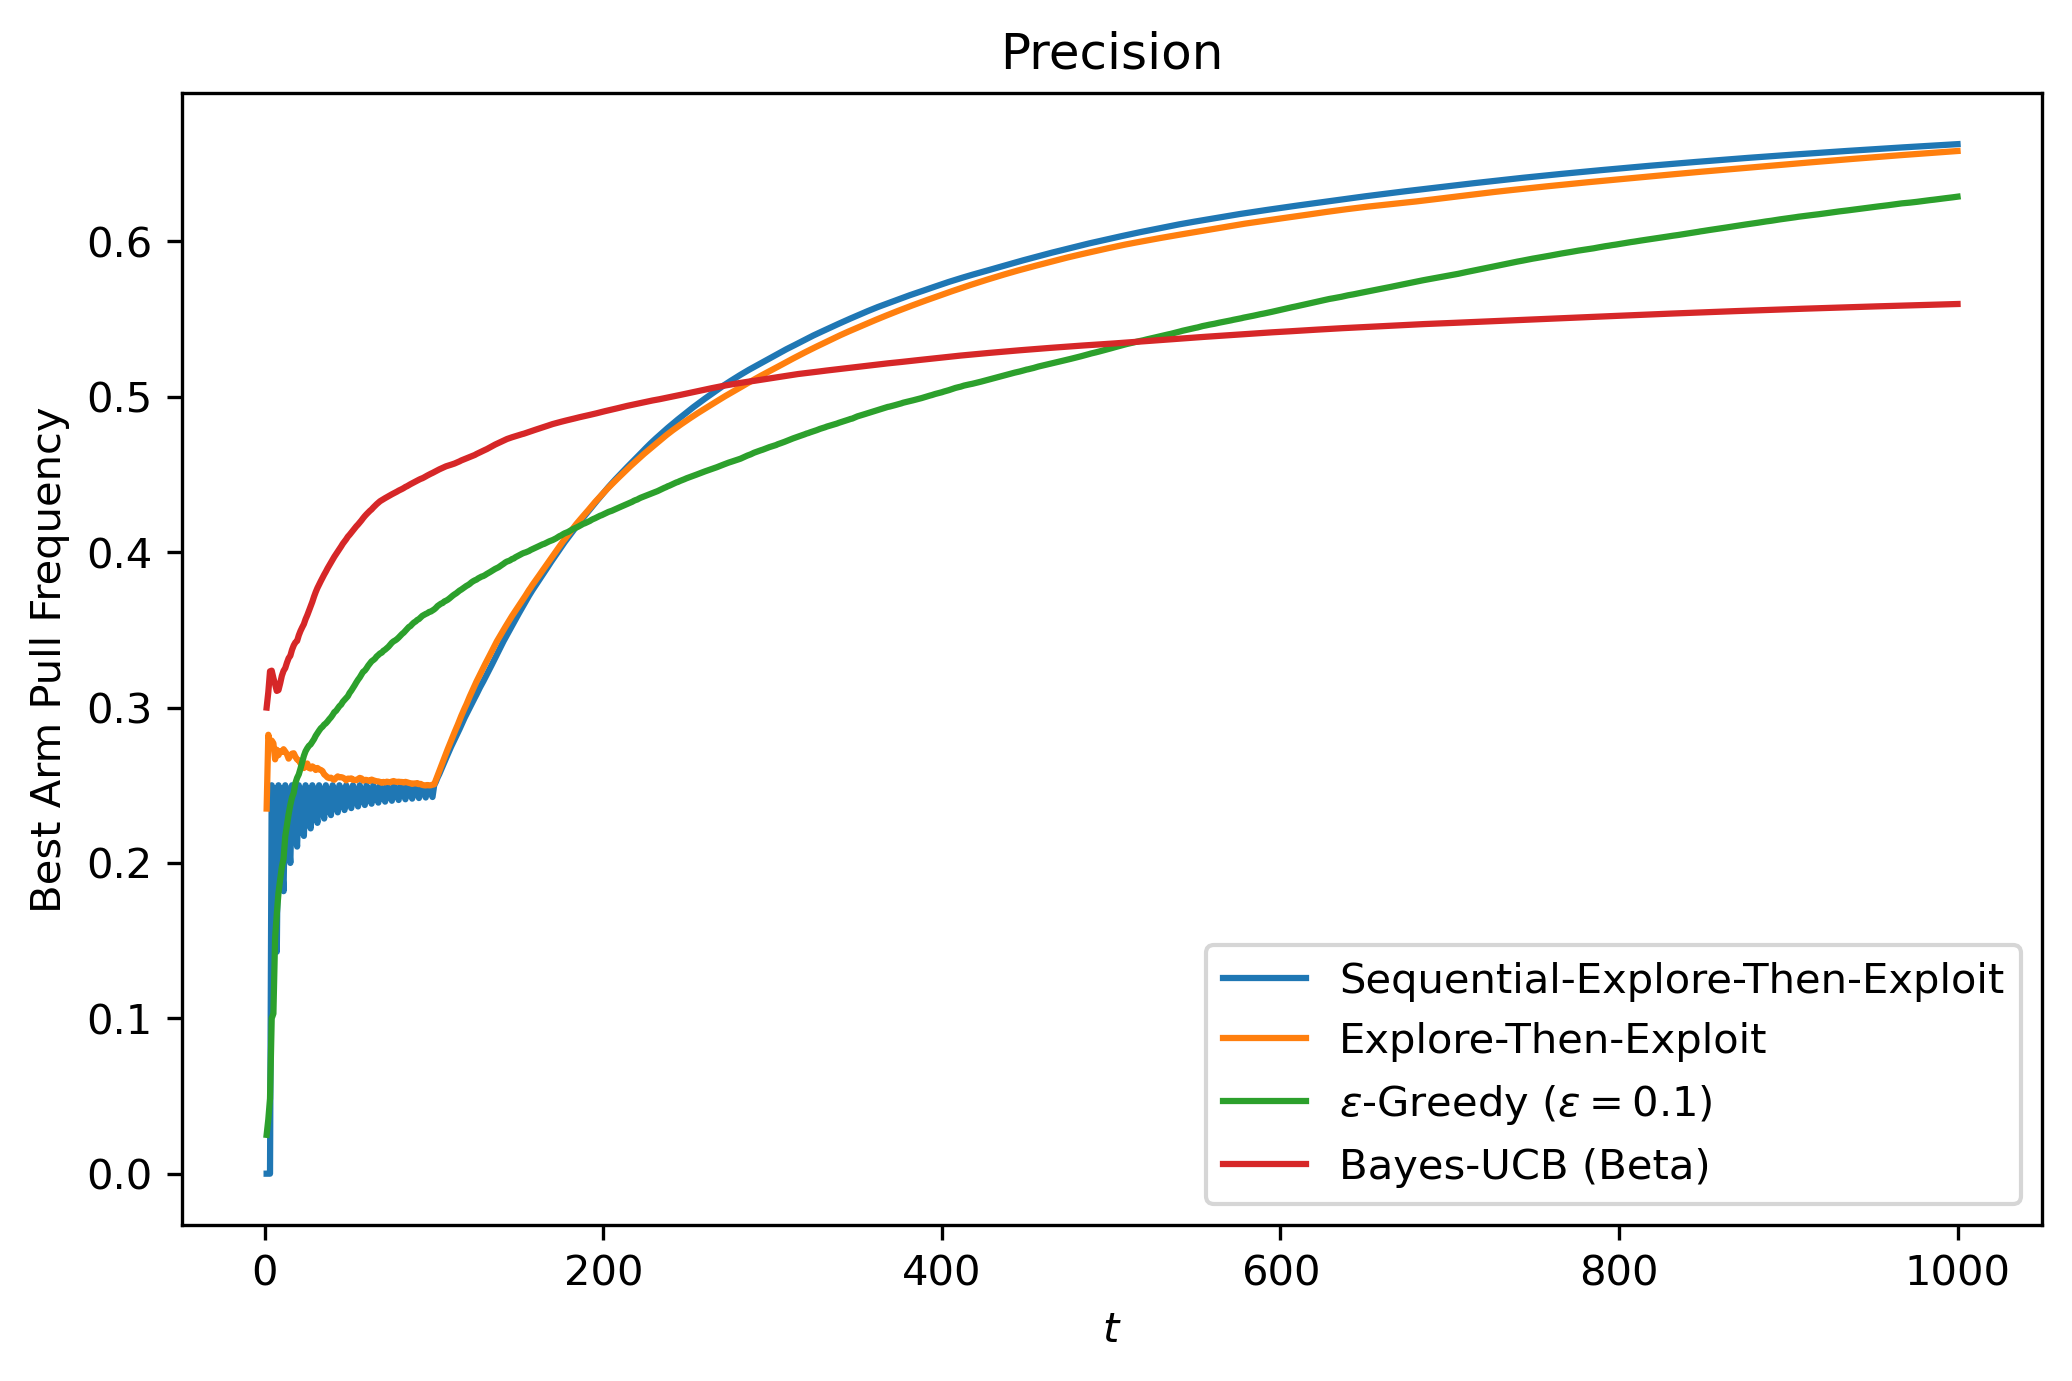

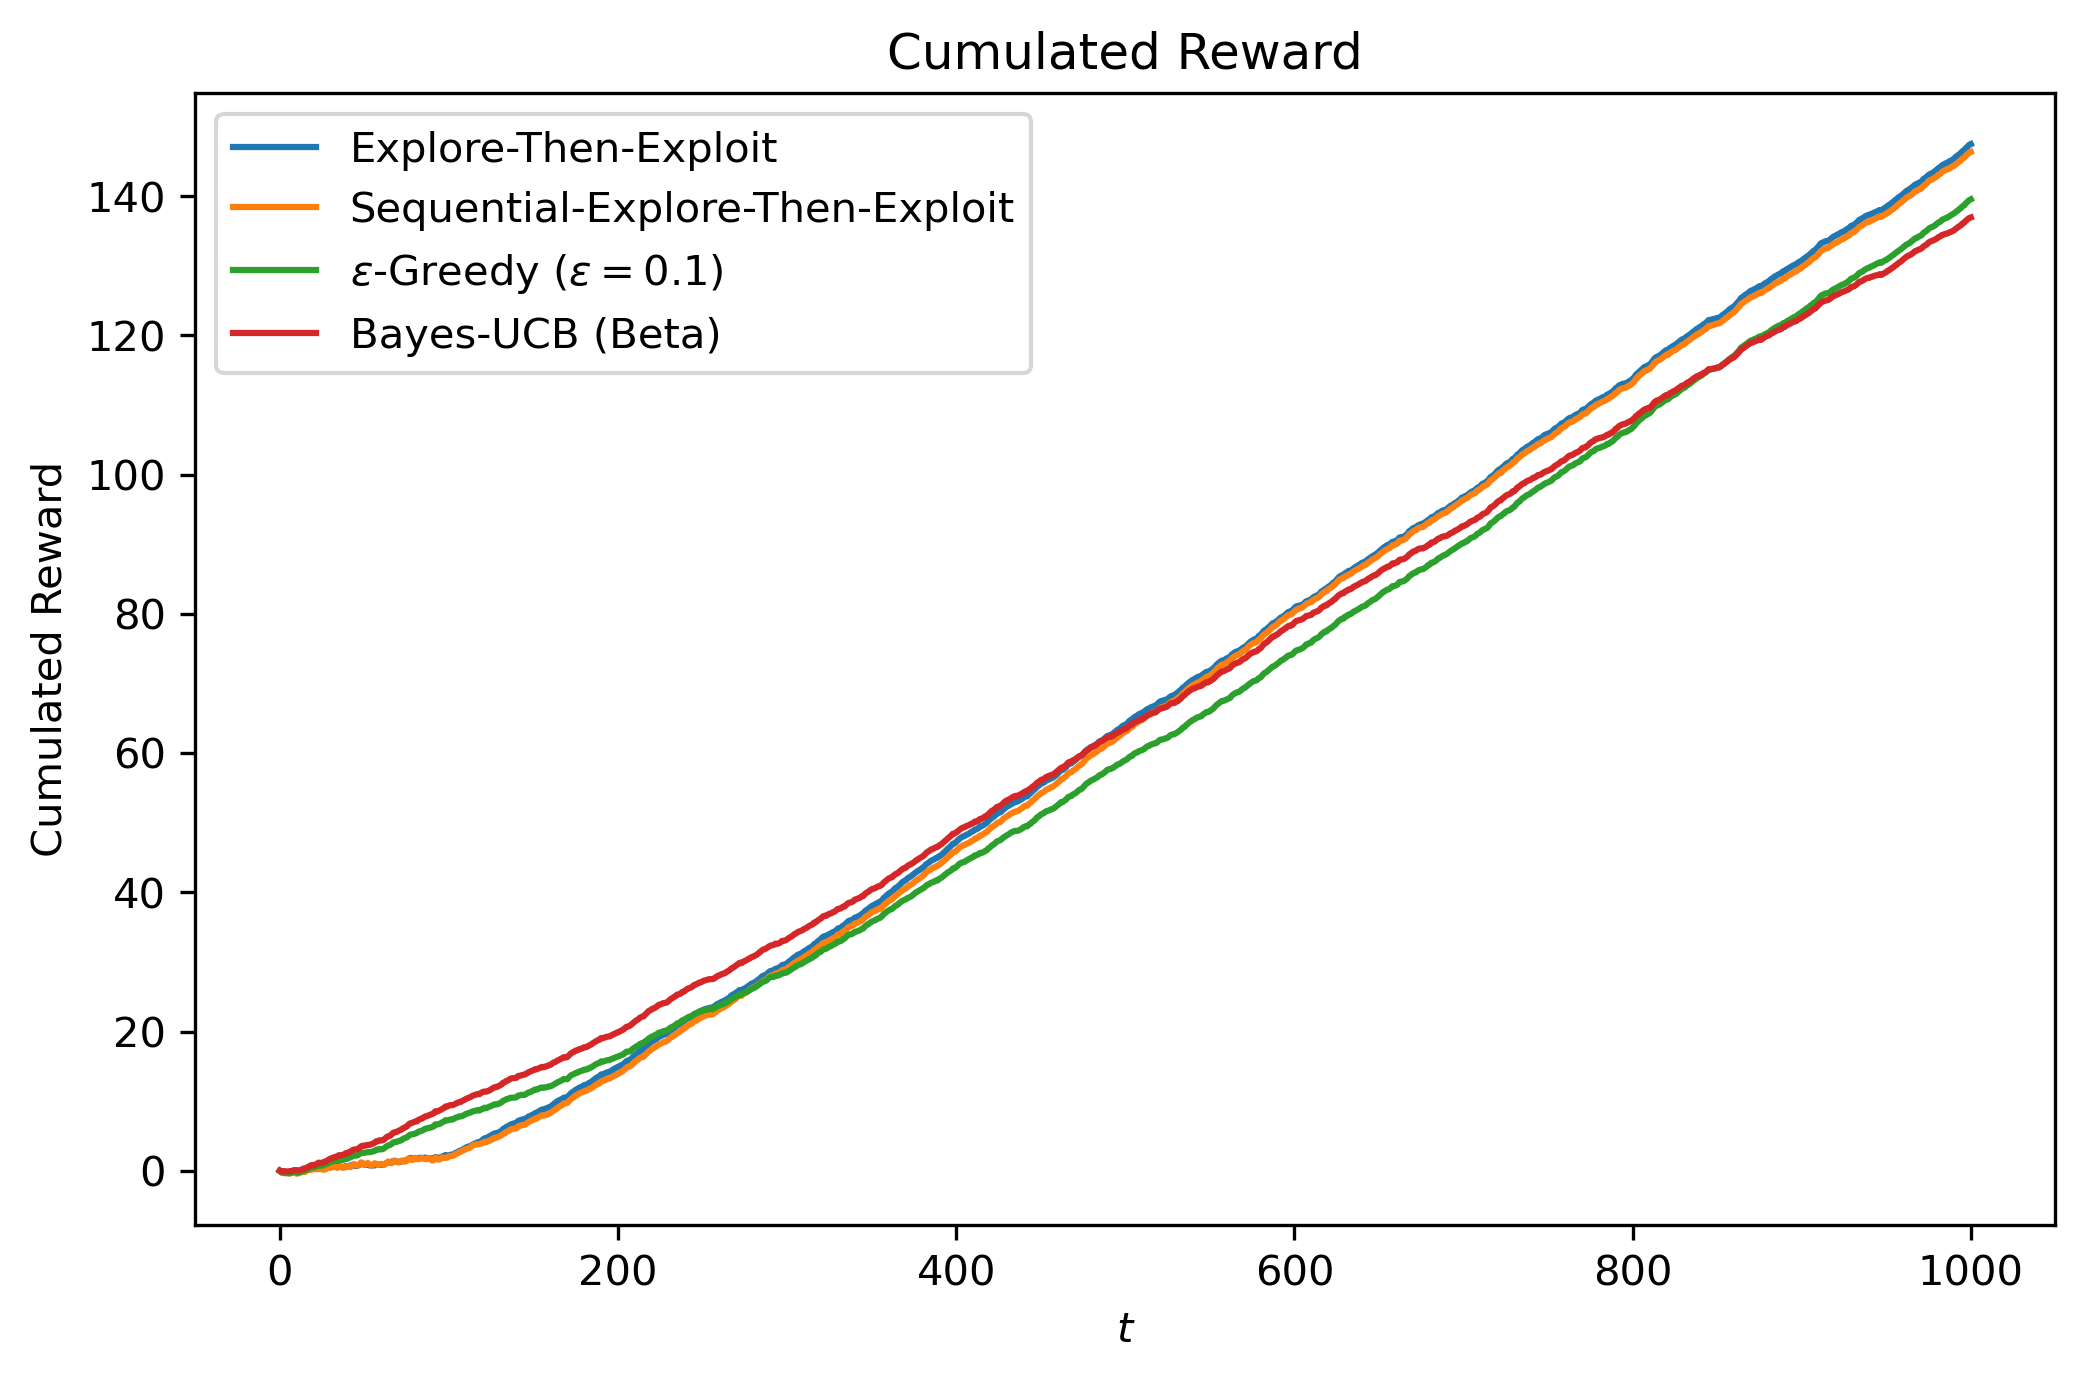

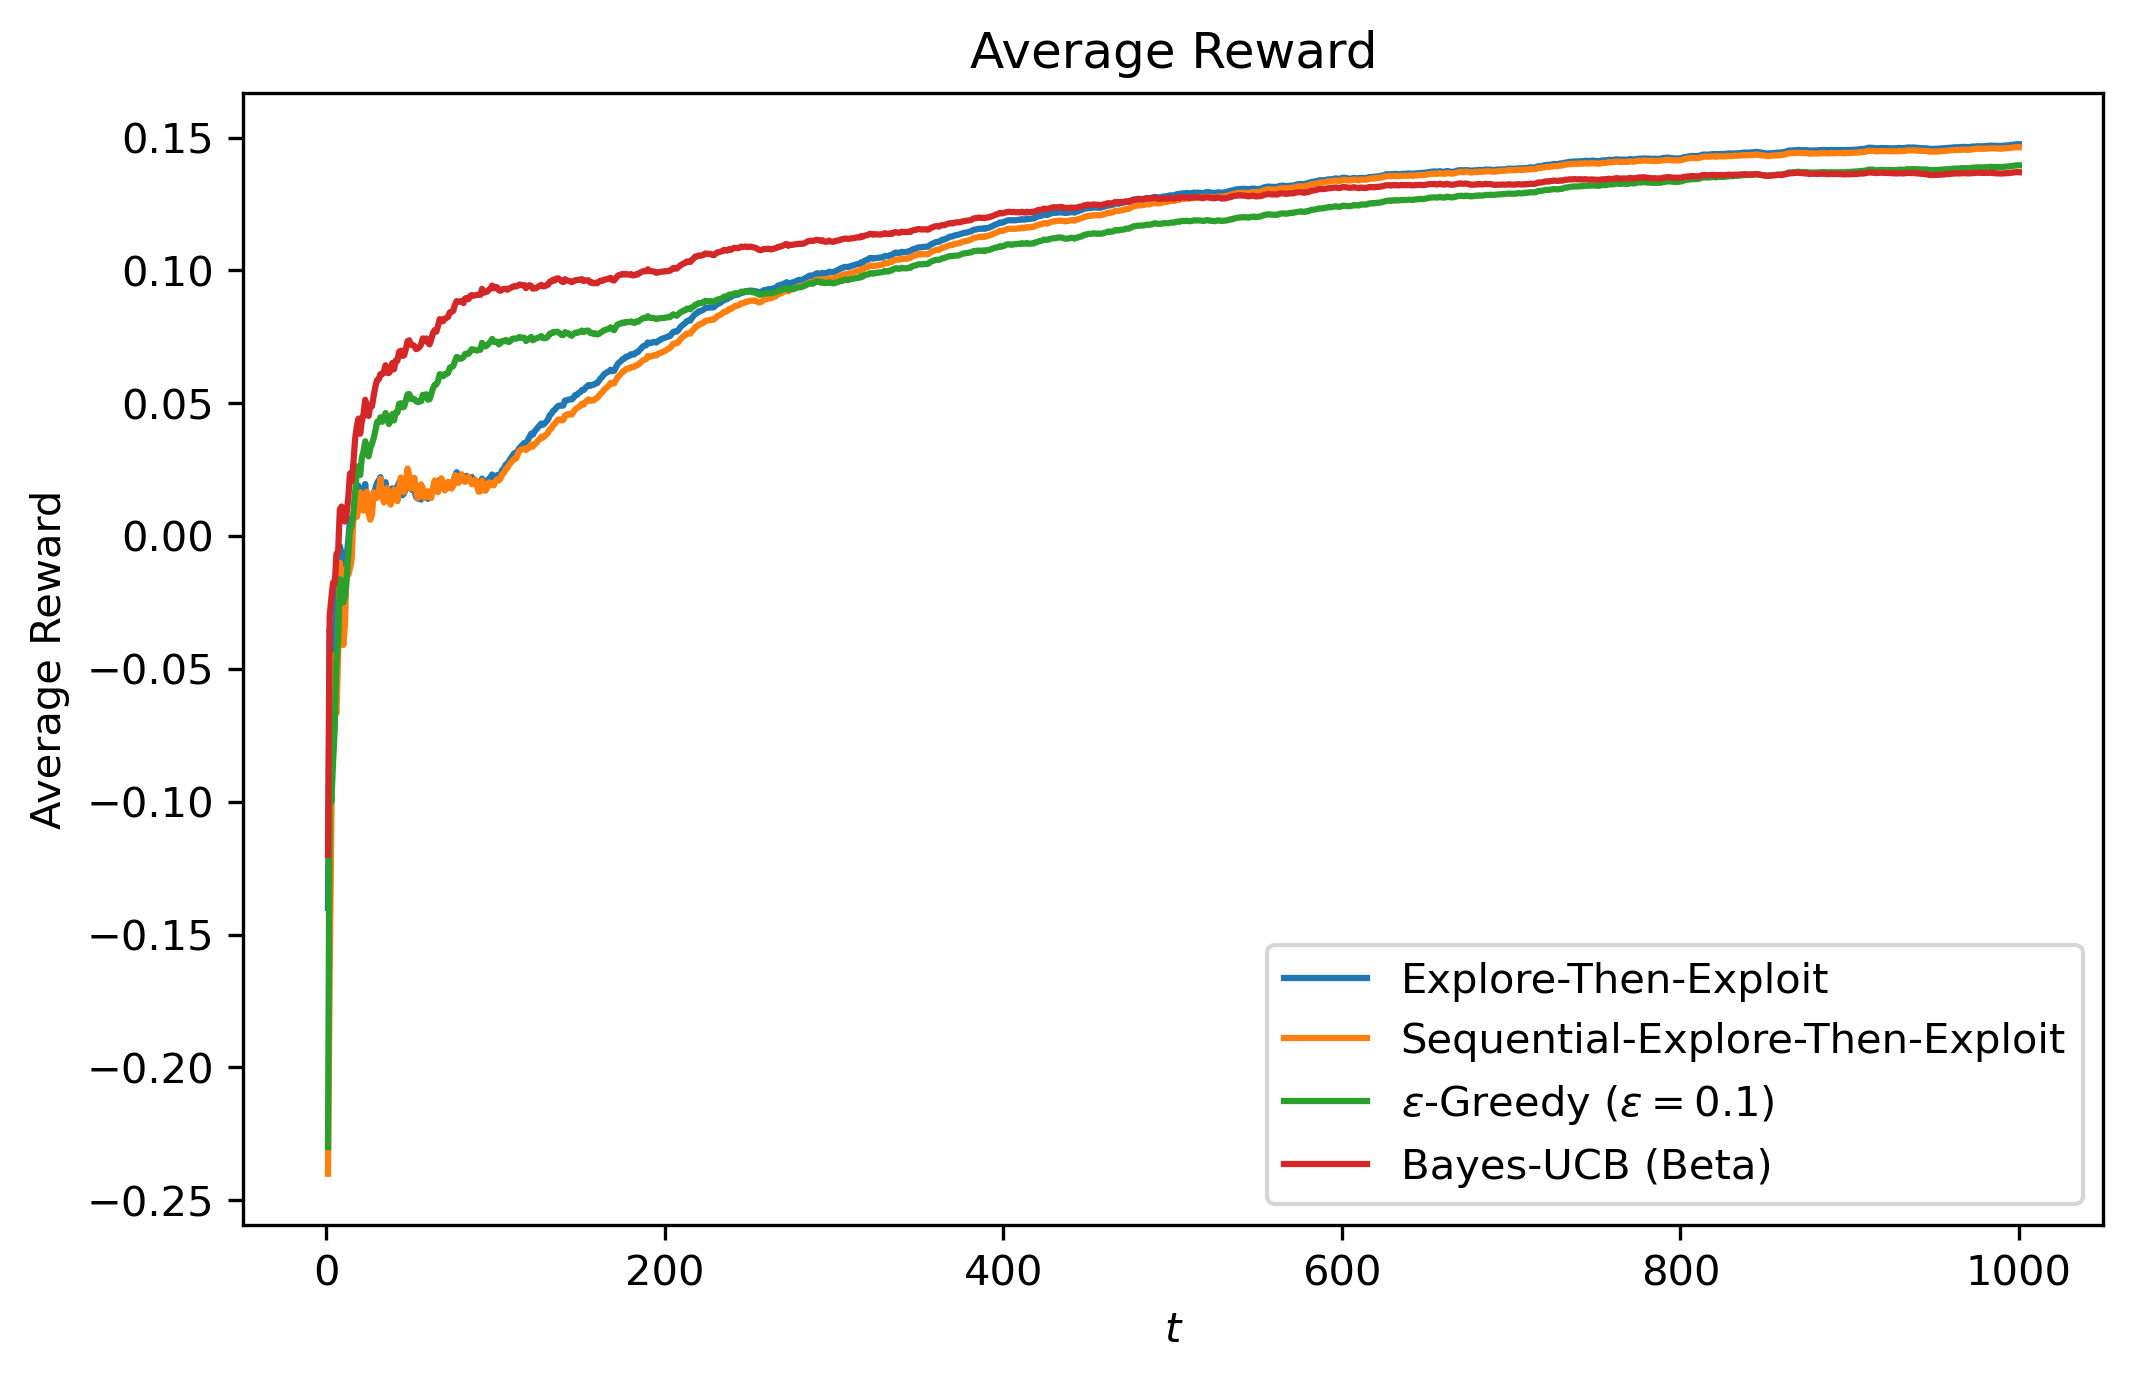

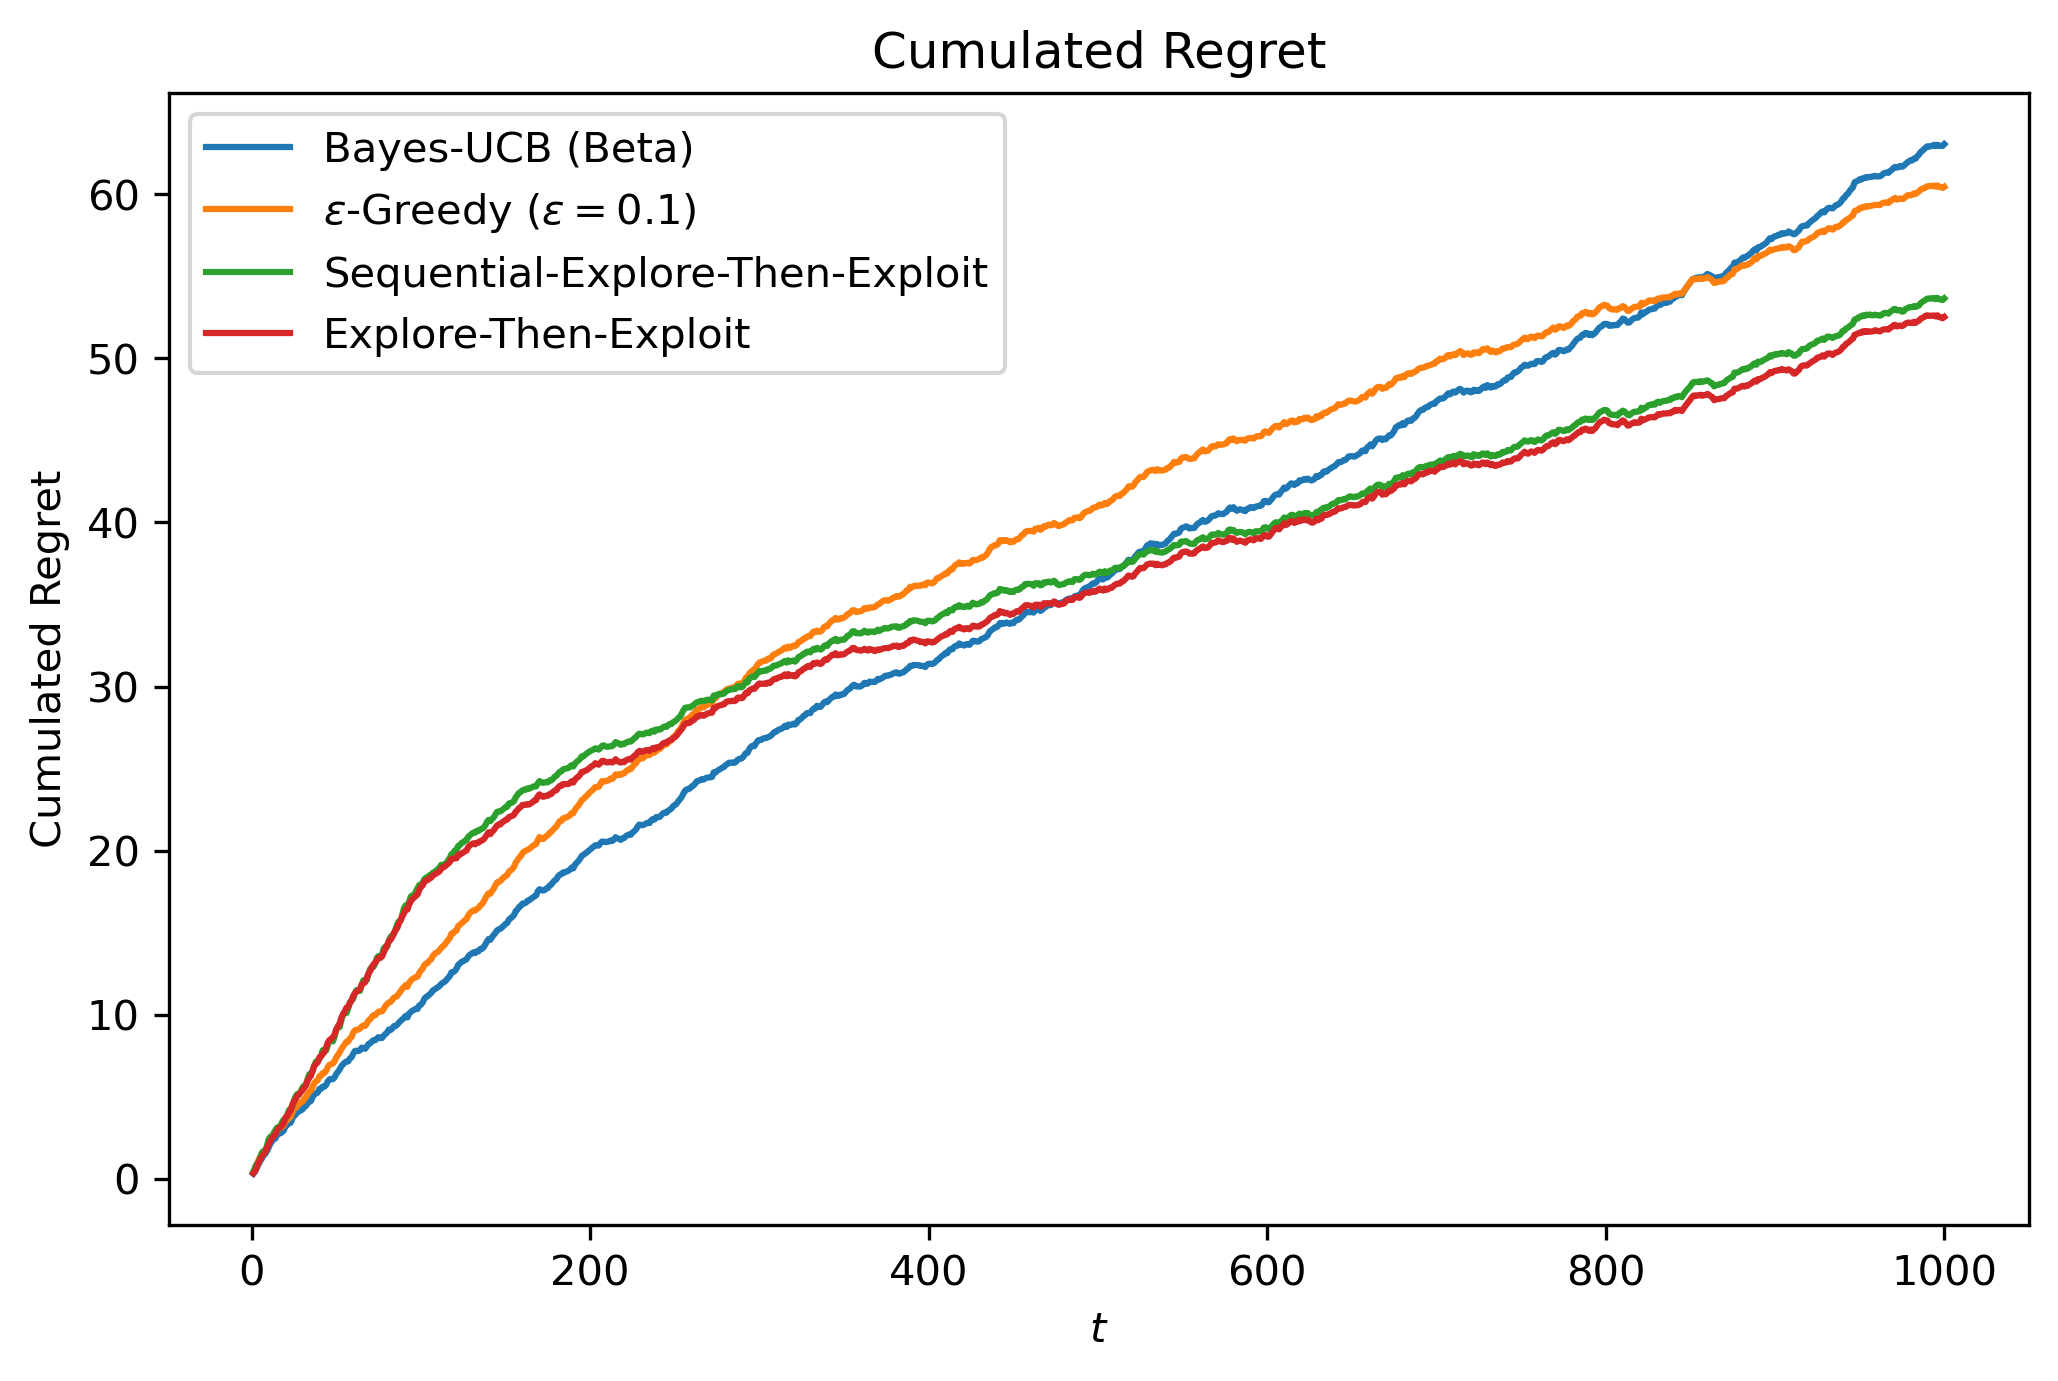

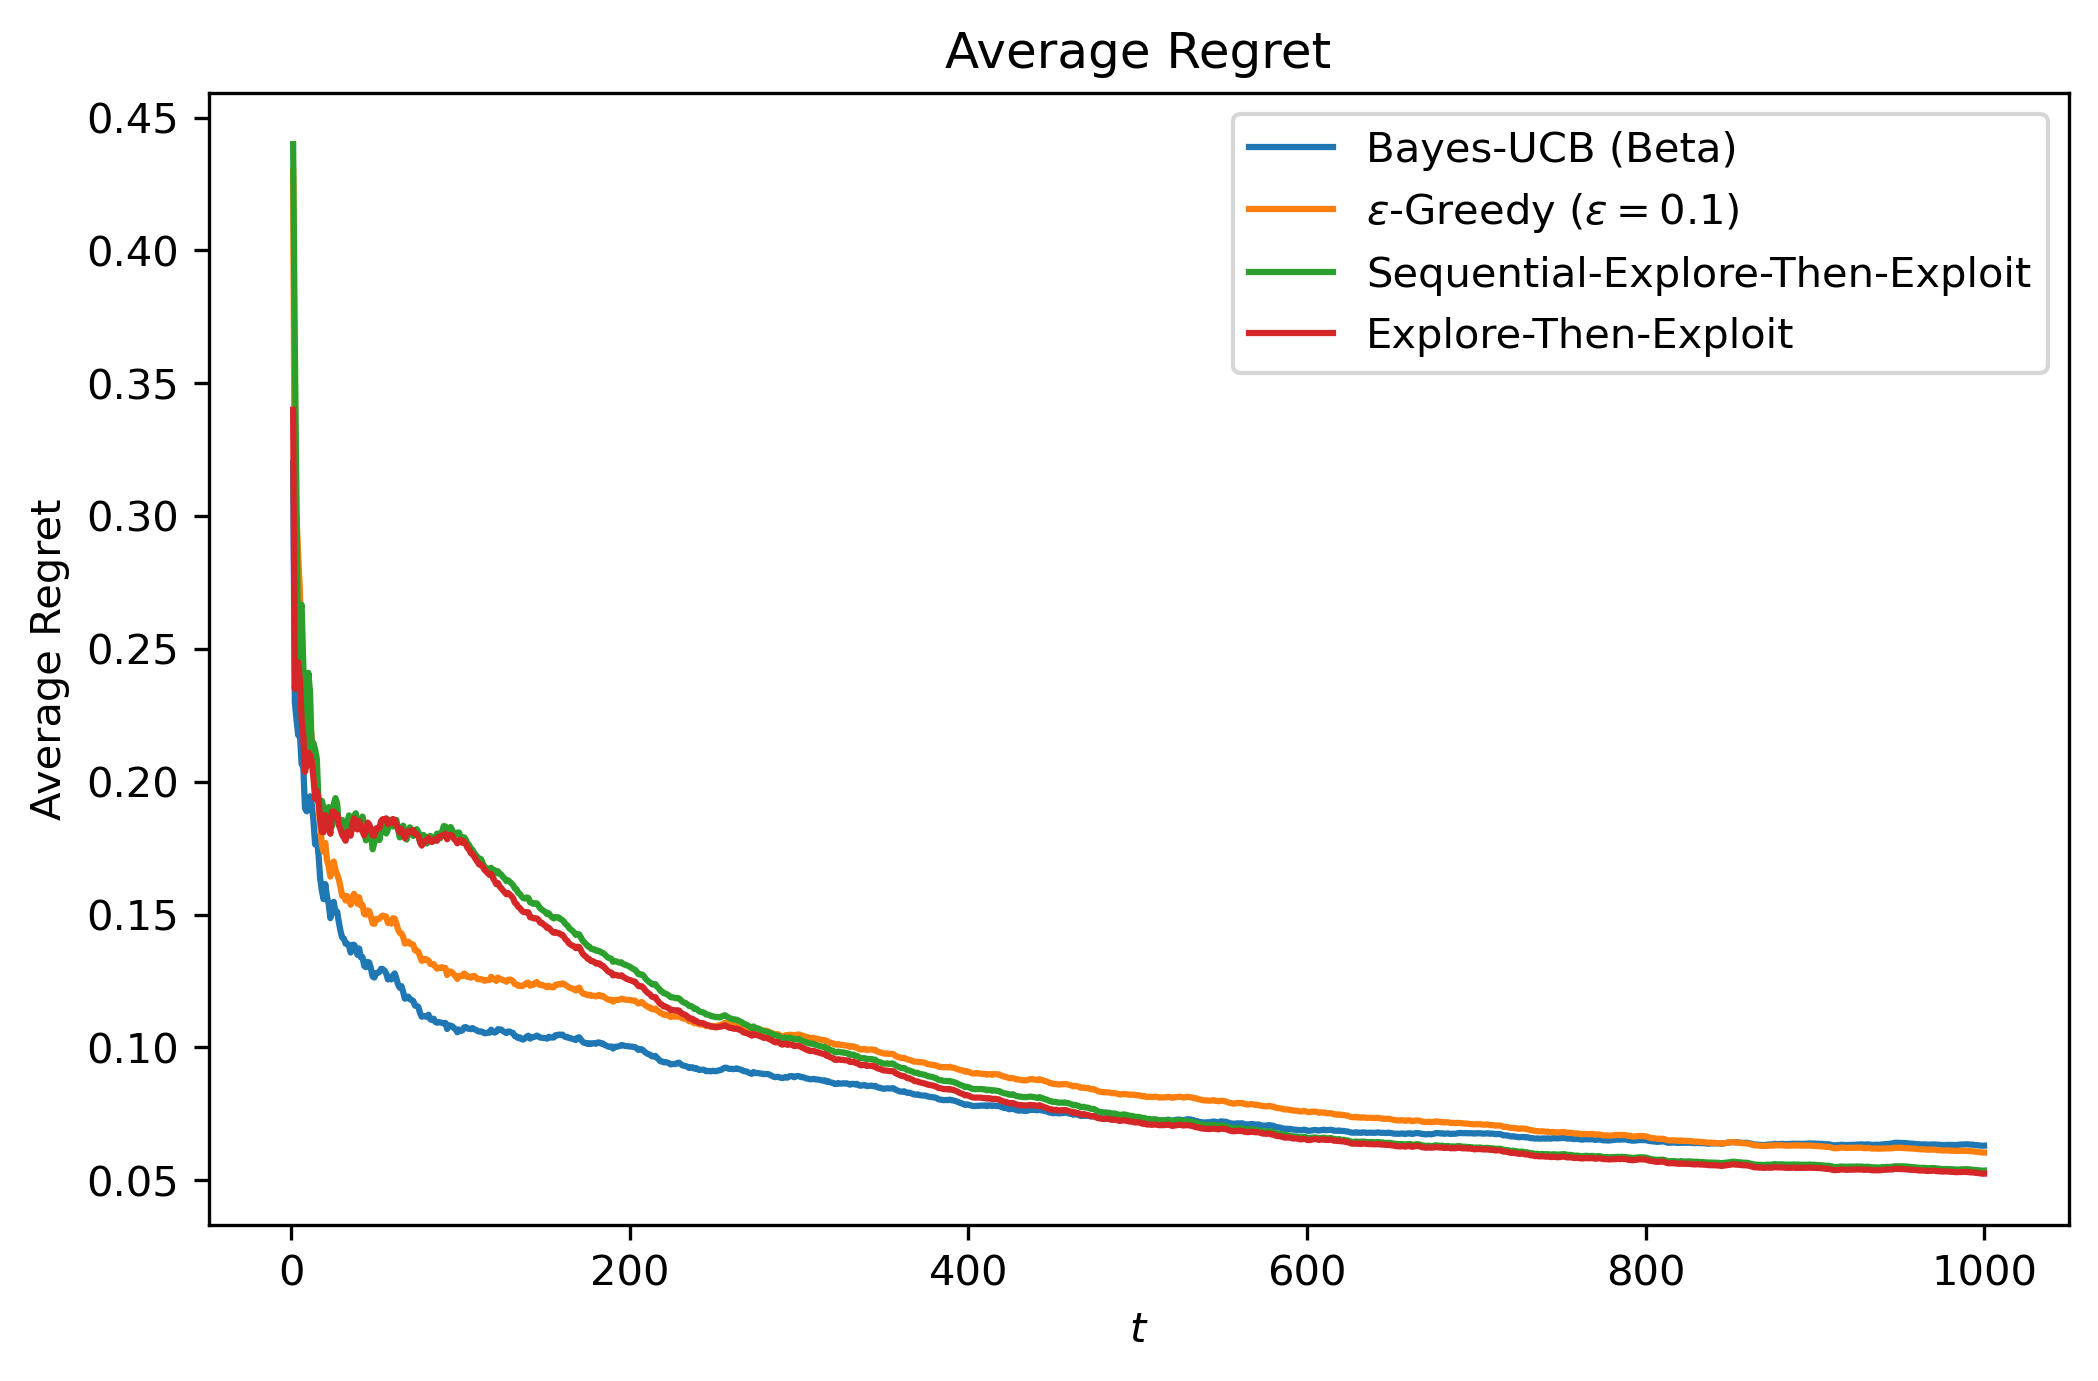

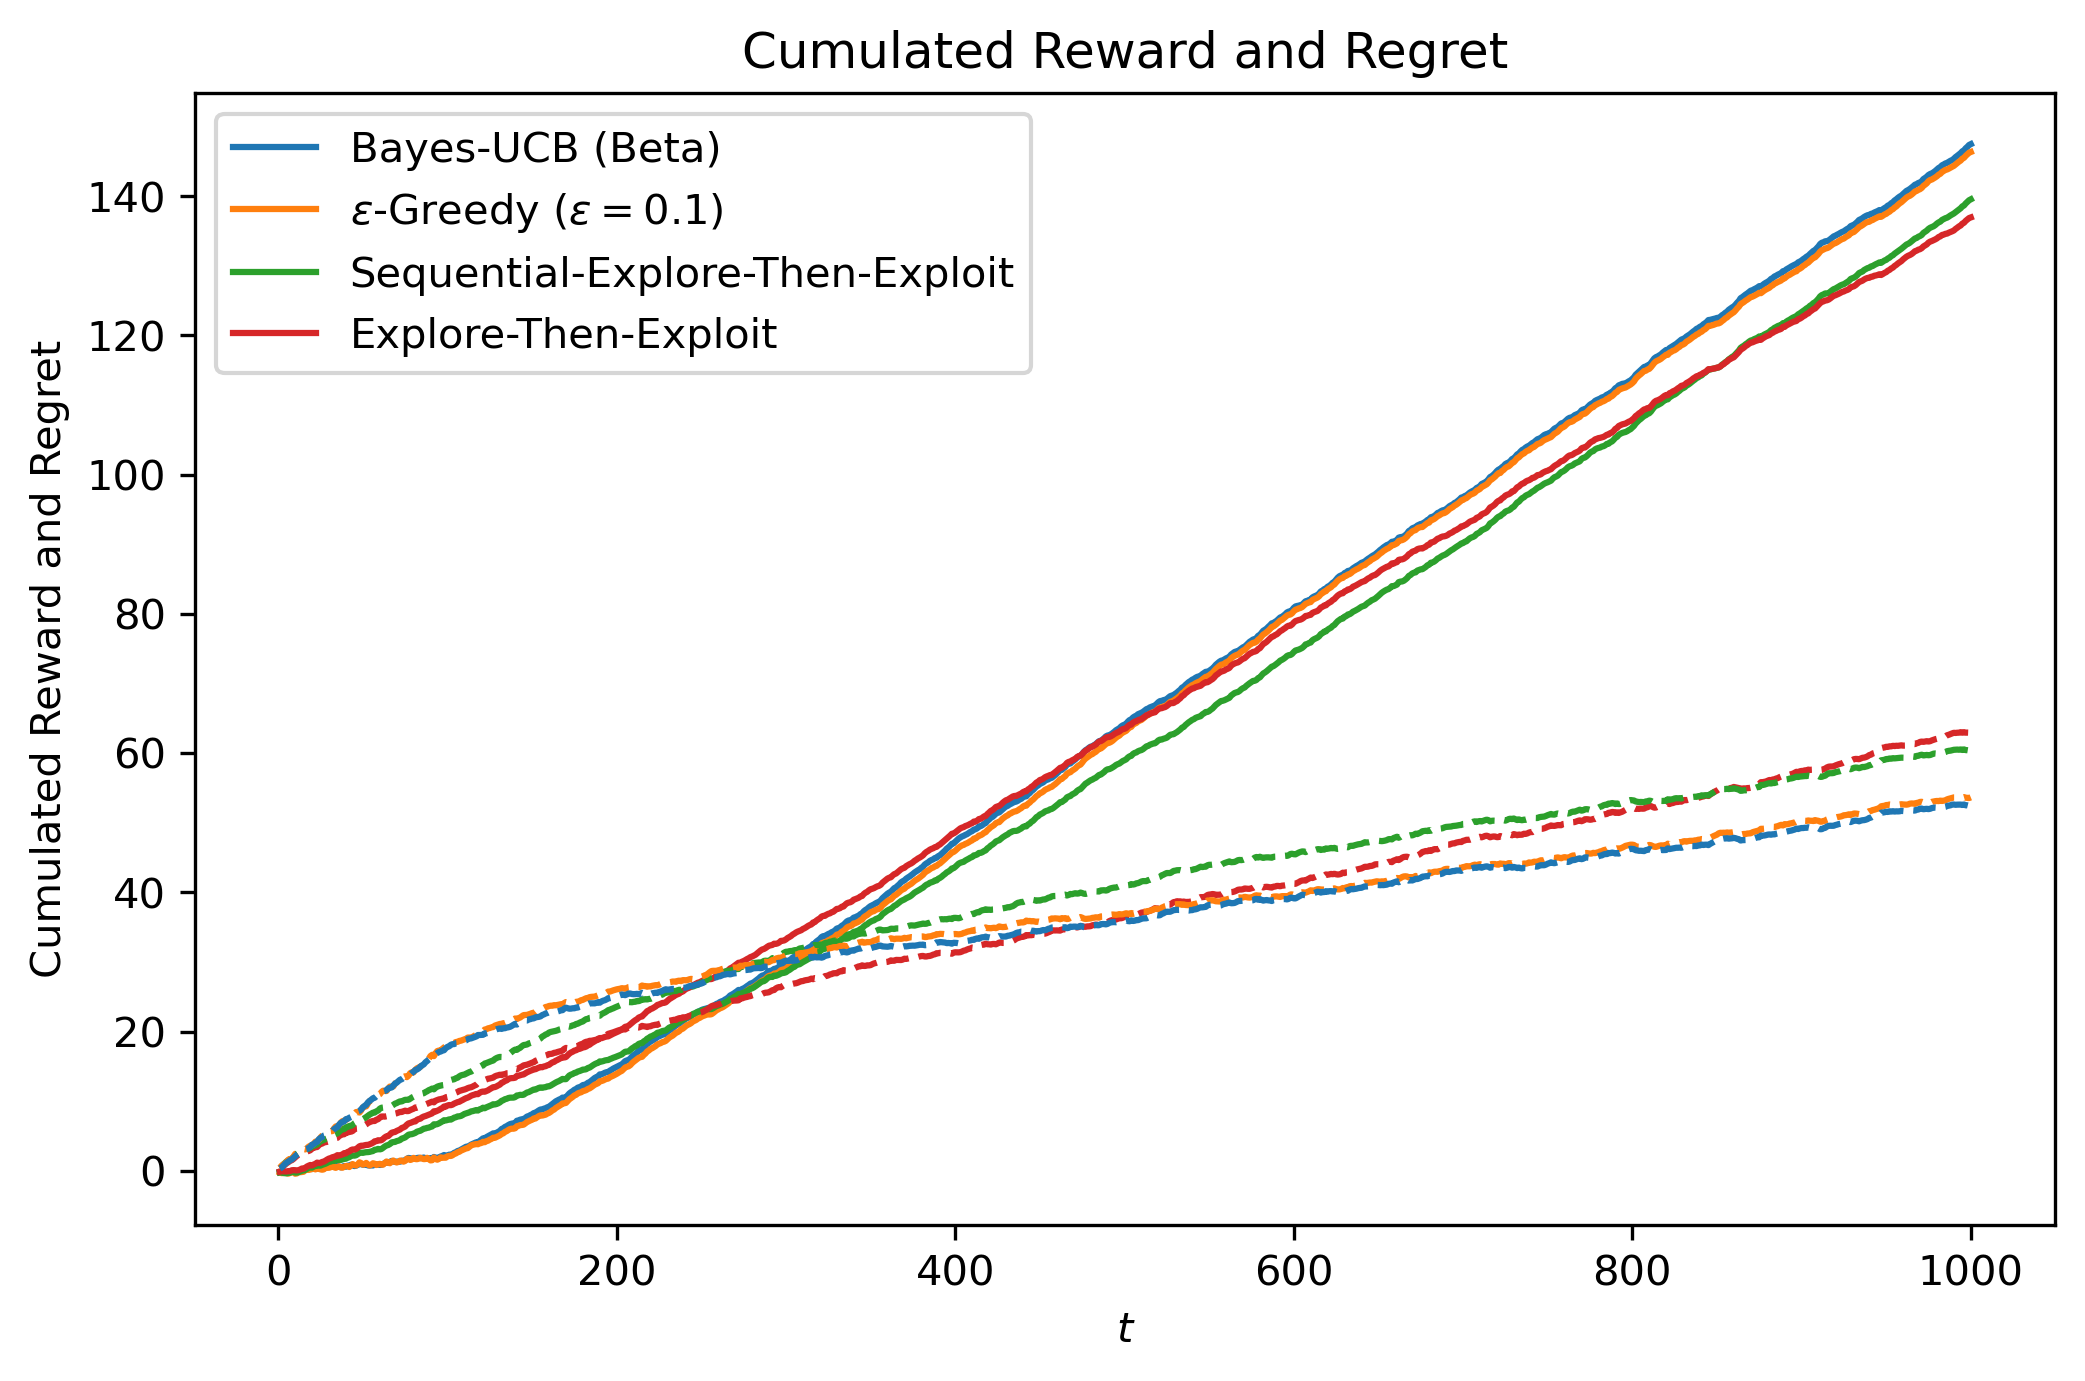

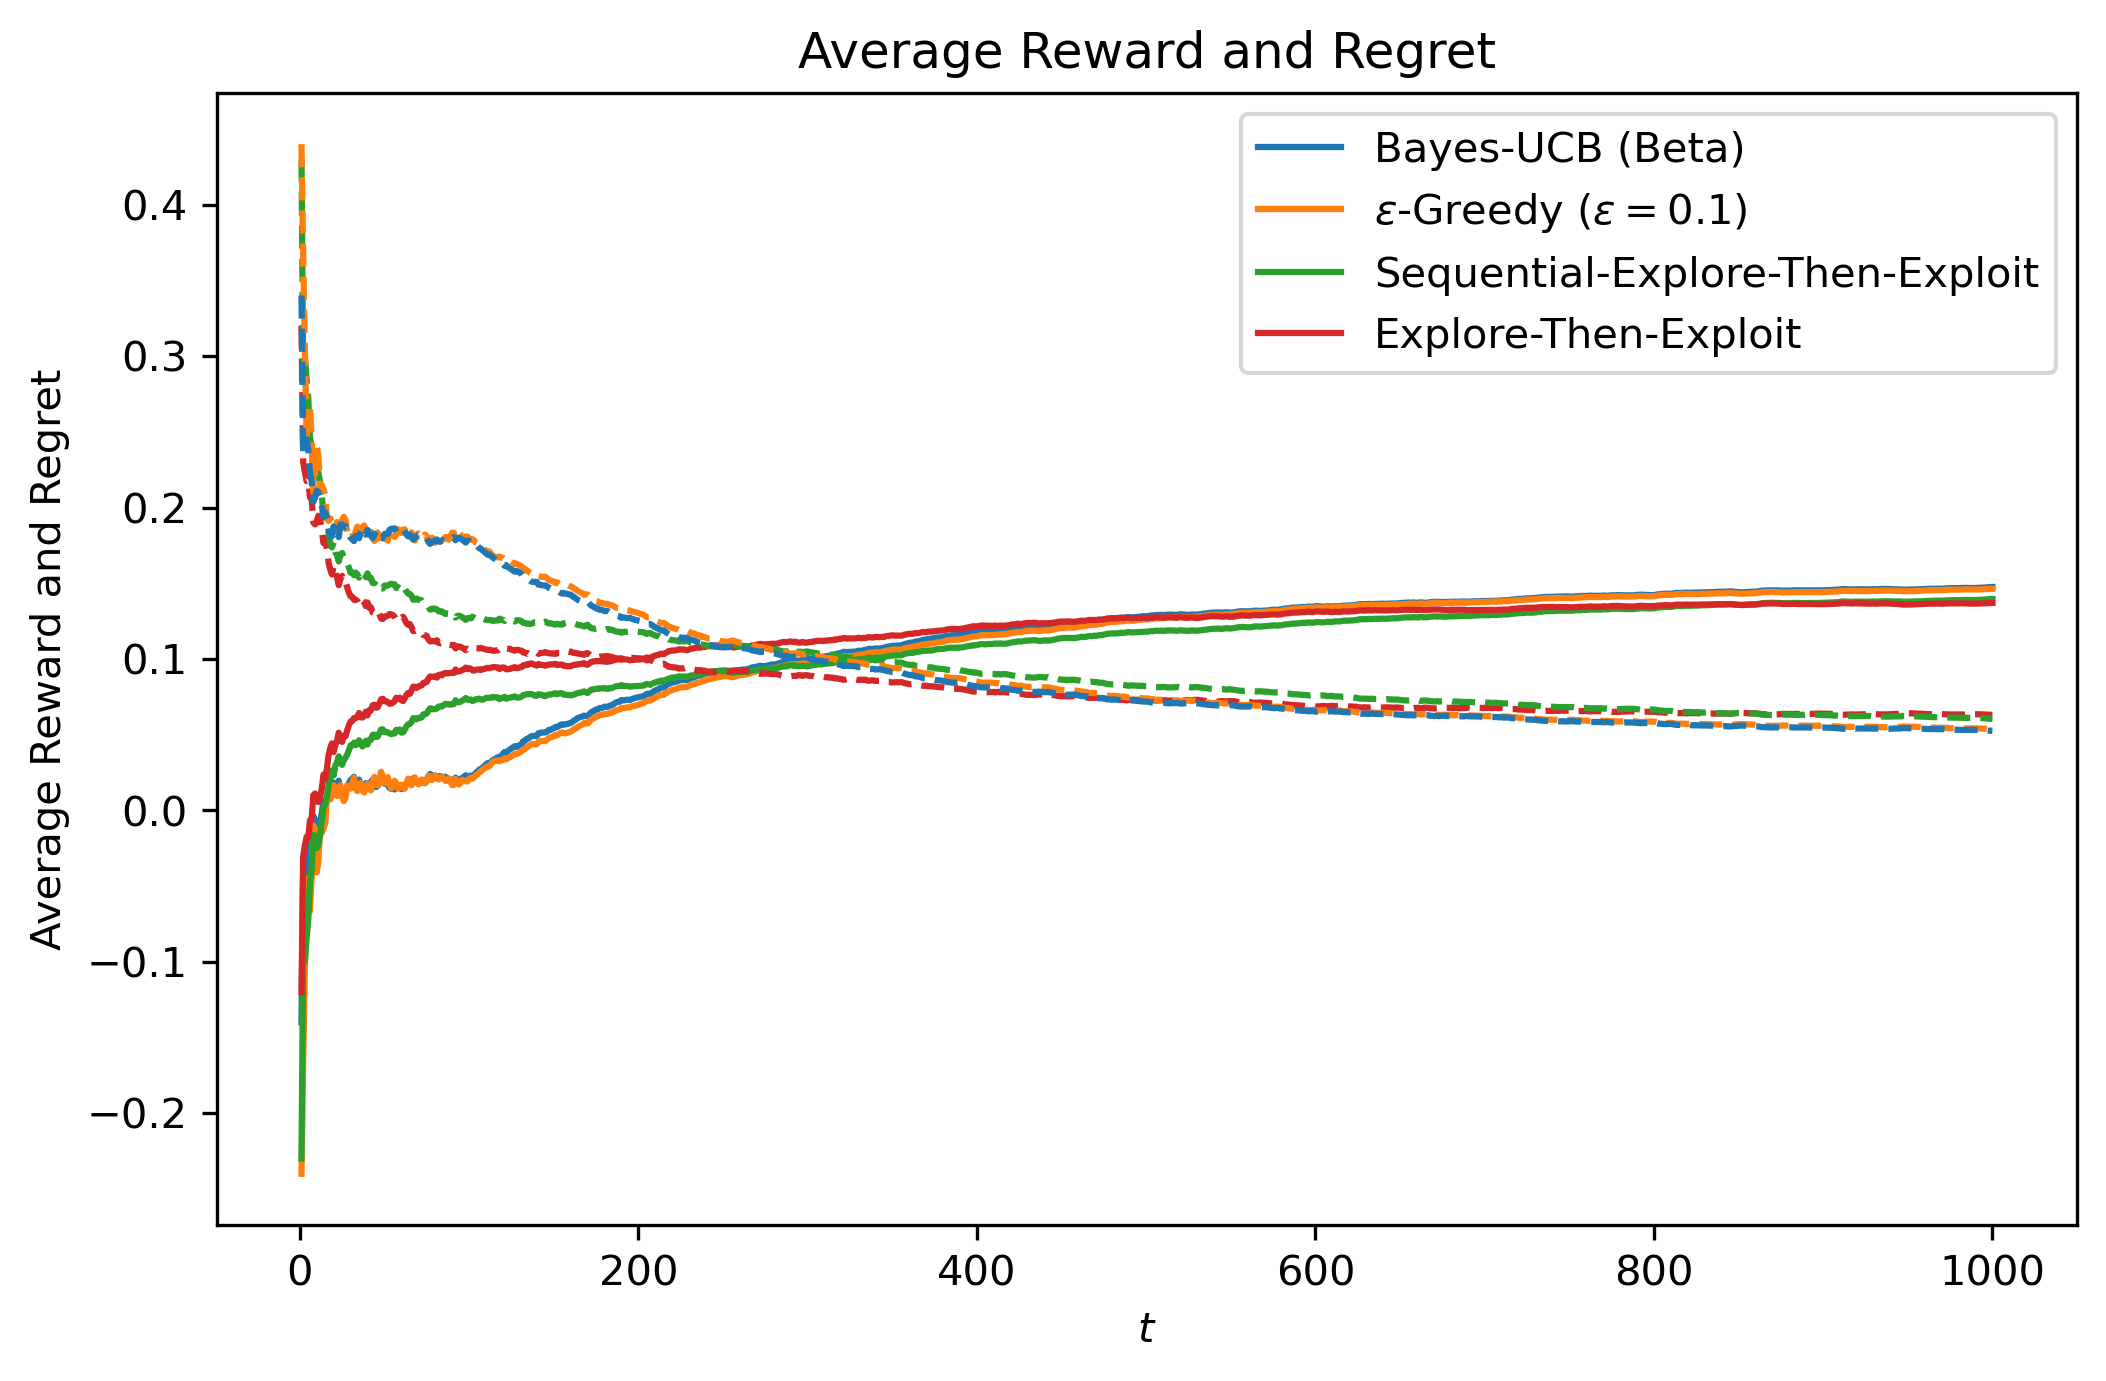

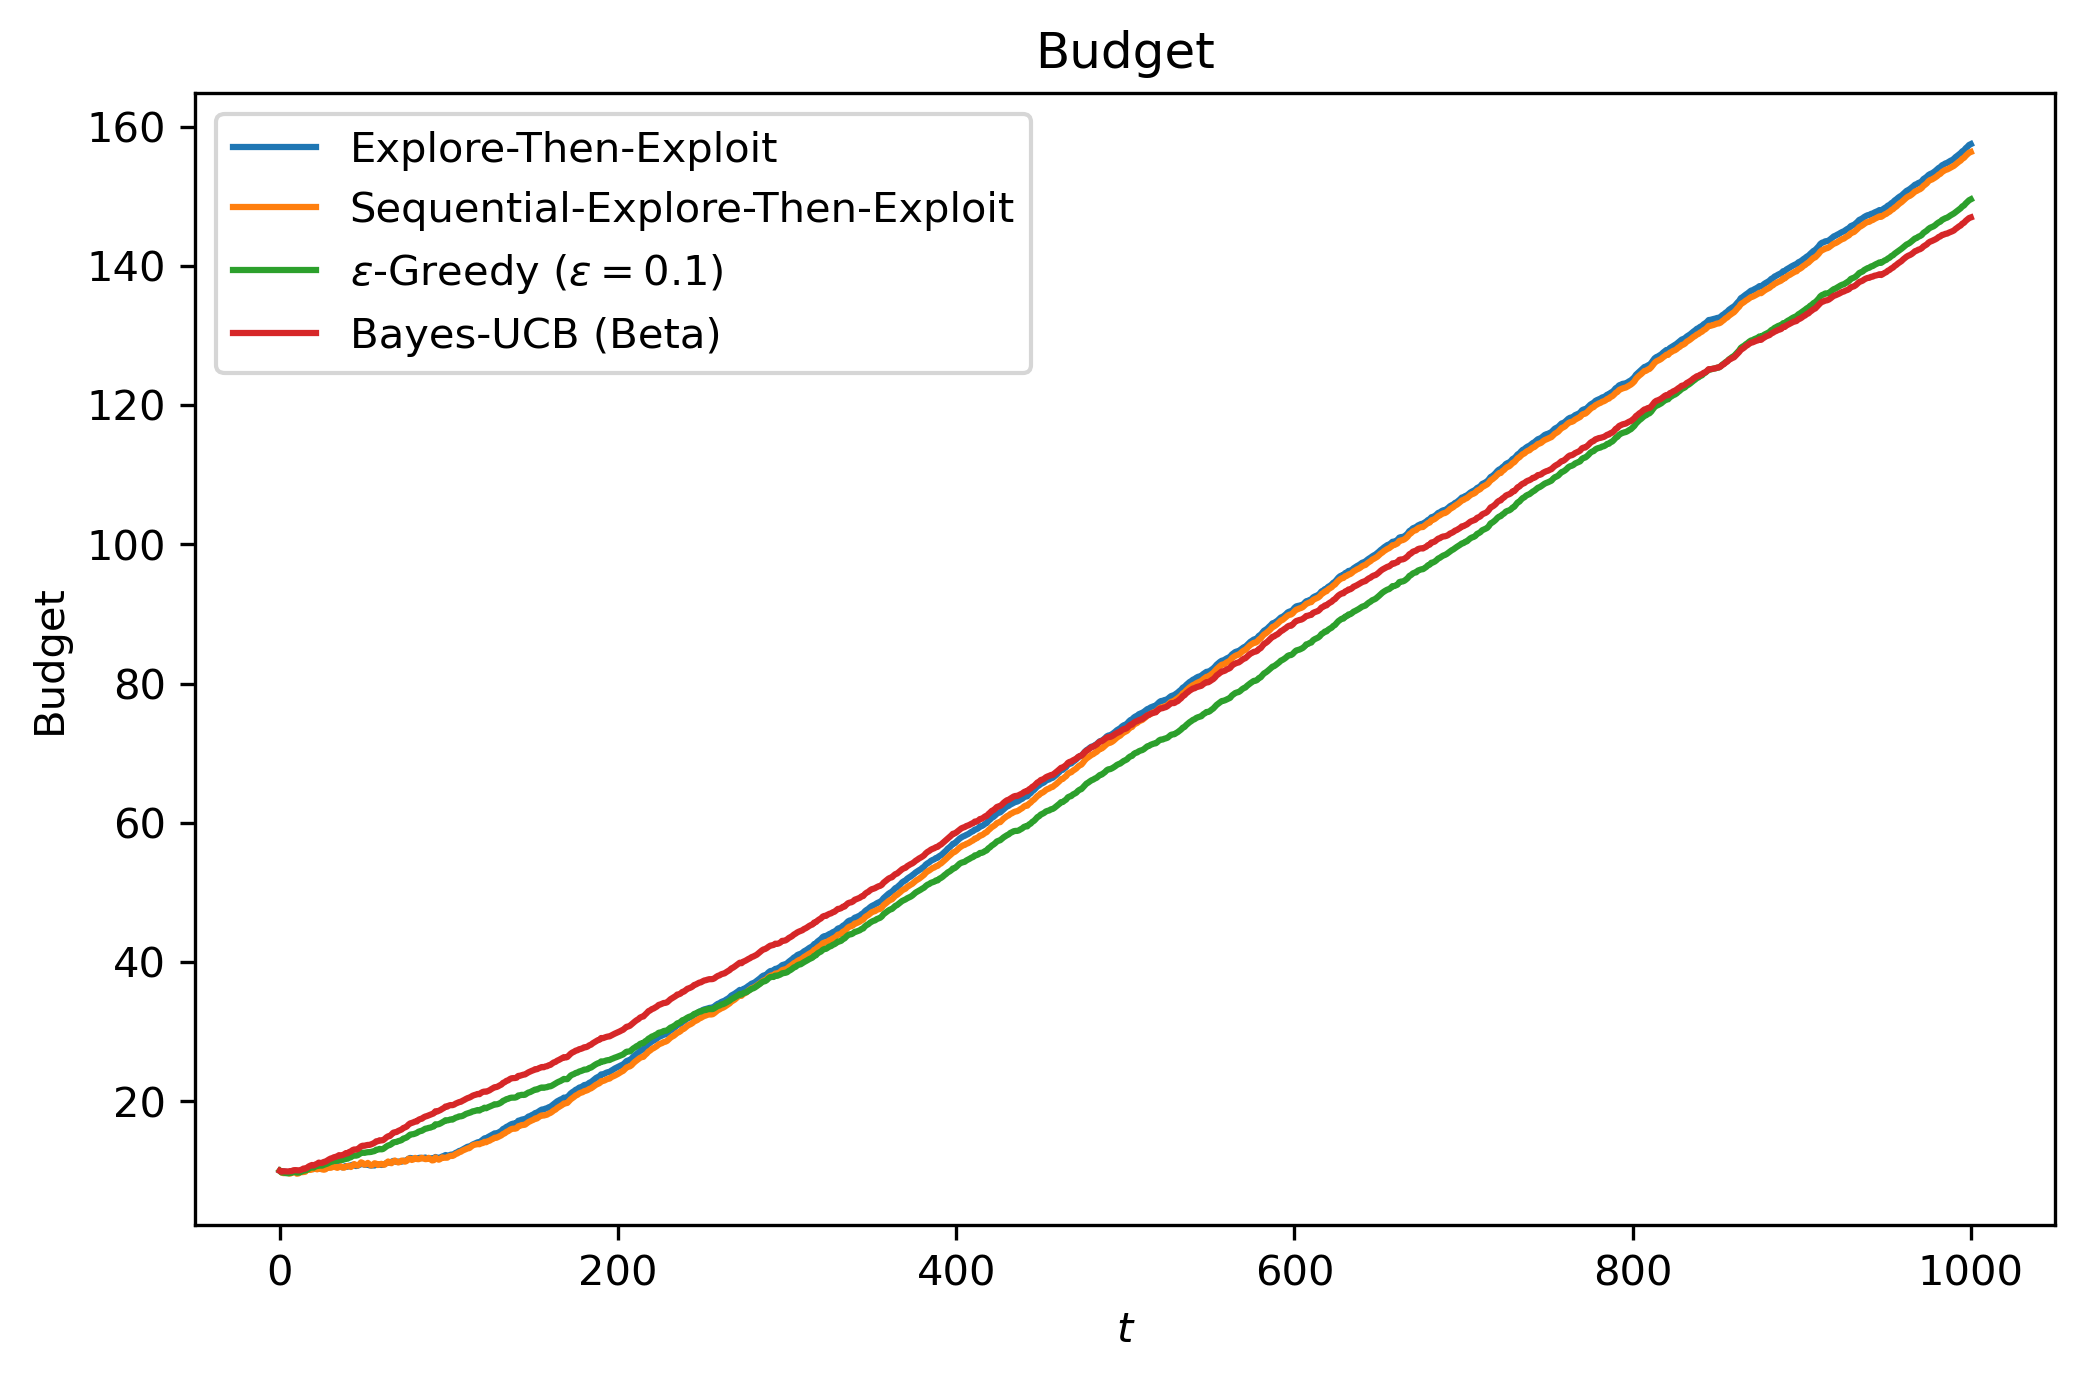

In [8]:
#M.plot_action_window_freq_spectrum()

M.plot_precision_progression()

M.plot_cumulated_reward_progression()
M.plot_average_reward_progression()
M.plot_cumulated_regret_progression()
M.plot_average_regret_progression()

#M.plot_comp_arm_count()
#M.plot_comp_arm_rewards()

M.plot_cumulated_reward_regret_progression()
M.plot_average_reward_regret_progression()

M.plot_budget_progression()
#M.plot_negative_budget_progression()
#M.plot_negative_budget_time_progression()
#M.plot_cumulated_negative_budget_progression()